In [1]:
import pandas as pd

# Load the dataset
file_path = "E:/UE Sose2024/Sem 2/Study Material/Machine Learning/P1/data_0.csv"
data = pd.read_csv(file_path, encoding='latin1')
# Inspect the data
print(data.head())
print(data.info())
print(data.describe().T)
print(data.nunique())
print(data.isnull().sum())
print(data.isnull().any())
print(data.duplicated())
print(data.duplicated().sum())
print(data[~data.isnull().any(axis=1) & ~data.duplicated()])
print((data['Quantity'] < 0).sum(), (data['UnitPrice'] < 0).sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [2]:
data_no_duplicates = data.copy()  # Create a copy of the data
data_no_duplicates = data.drop_duplicates()  # Drop duplicates

# Print the shape of the original and the no-duplicates DataFrame
print(data.shape)  # Correct way to access shape
print(data_no_duplicates.shape)  # Correct way to access shape

(541909, 8)
(536641, 8)


In [3]:
# Step 1: Create a copy to preserve original data
data_filled = data_no_duplicates.copy()

# Step 2: Create a mapping of StockCode to the most common Description
stockcode_to_description = (
    data_filled.groupby("StockCode")["Description"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

# Step 3: Fill missing Descriptions using StockCode mapping
data_filled["Description"] = data_filled["Description"].fillna(data_filled["StockCode"].map(stockcode_to_description))

# Step 4: If any missing values remain, fill with most common description in the dataset
if data_filled["Description"].isnull().sum() > 0:
    most_common_description = data_filled["Description"].mode()[0]
    data_filled["Description"] = data_filled["Description"].fillna(most_common_description)

# Step 5: Verify if all missing values are filled
print("Missing values in Description after filling:", data_filled["Description"].isnull().sum())  # Should be 0

# Display sample rows with filled descriptions
print(data_filled.head())
print(data_filled.isnull().sum())

Missing values in Description after filling: 0
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country     

In [4]:
# Step 1: Create a copy to preserve original data
data_imputation = data_filled.copy()

# Step 2: Fill missing CustomerID using forward and backward fill within the same InvoiceNo
data_imputation["CustomerID"] = (
    data_imputation.groupby("InvoiceNo")["CustomerID"]
    .transform(lambda x: x.ffill().bfill())
)

# Step 3: If there are still missing values, interpolate them (based on previous & next values)
data_imputation["CustomerID"] = data_imputation["CustomerID"].interpolate()

# Step 4: Convert CustomerID to integer (optional, only if there are no remaining NaNs)
if data_imputation["CustomerID"].isnull().sum() == 0:
    data_imputation["CustomerID"] = data_imputation["CustomerID"].astype(int)

# Step 5: Verify if all missing values are filled
print("Missing values in CustomerID after filling:", data_imputation["CustomerID"].isnull().sum())  # Should be 0

# Display sample rows with filled CustomerID
print(data_imputation.head())
print(data_imputation.isnull().sum())

Missing values in CustomerID after filling: 0
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55       17850  United Kingdom  
1  12/1/2010 8:26       3.39       17850  United Kingdom  
2  12/1/2010 8:26       2.75       17850  United Kingdom  
3  12/1/2010 8:26       3.39       17850  United Kingdom  
4  12/1/2010 8:26       3.39       17850  United Kingdom  
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [5]:
print(data_imputation.groupby("InvoiceNo")["CustomerID"].nunique())
print(data_imputation.head())  # Show the first few rows of the DataFrame
print(data_imputation.info())  # Information about the DataFrame
print(data_imputation.describe().T)  # Summary statistics of the DataFrame
print(data_imputation.nunique())  # Number of unique values in each column
print(data_imputation.isnull().sum())  # Count of missing values in each column
print(data_imputation.isnull().any())  # Check if any column has missing values
print(data_imputation.duplicated())  # Show duplicated rows (True/False)
print(data_imputation.duplicated().sum())  # Count of duplicated rows
print(data_imputation[~data_imputation.isnull().any(axis=1) & ~data_imputation.duplicated()])  # Data without missing values or duplicates
print((data_imputation['Quantity'] < 0).sum(), (data_imputation['UnitPrice'] < 0).sum())  # Count of negative values in Quantity and UnitPrice
print(data.shape)
print(data_imputation.shape)

InvoiceNo
536365     1
536366     1
536367     1
536368     1
536369     1
          ..
C581484    1
C581490    1
C581499    1
C581568    1
C581569    1
Name: CustomerID, Length: 25900, dtype: int64
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55       17850  United Kingdom  
1  12/1/2010 8:26       3.39       17850  United Kingdom  
2  12/1/2010 8:26       2.75       17850  United Kingdom  
3  12/1/2010 8:26       3.39       17850  United Kingdom  
4  12/1/2010 8:26       3.39       17850  United Kingdom  
<class 'pandas

In [6]:
# Create a copy of the original DataFrame
data_no_negatives = data_imputation.copy()

# Remove rows where 'Quantity' or 'UnitPrice' are less than or equal to zero
data_no_negatives = data_no_negatives[(data_no_negatives['Quantity'] > 0) & (data_no_negatives['UnitPrice'] > 0)]

# Create a copy of the original DataFrame for the negatives
data_only_negatives = data_imputation.copy()

# Filter out rows where 'Quantity' or 'UnitPrice' are greater than zero (keep values that are 0 or less)
data_only_negatives = data_only_negatives[(data_only_negatives['Quantity'] <= 0) | (data_only_negatives['UnitPrice'] <= 0)]

# Check the first few rows of each DataFrame to confirm
print("Data without negatives (data_no_negatives):")
print(data_no_negatives.head())

print("\nData with only negatives (data_only_negatives):")
print(data_only_negatives.head())

# Additional information about the DataFrames
print(data.shape)
print(data_imputation.shape)
print(data_no_negatives.isnull().sum())
print(data_no_negatives.shape)
print(data_only_negatives.isnull().sum())
print(data_only_negatives.shape)
print(data_no_negatives.nunique())
print(data_no_negatives.dtypes)
print(data_only_negatives.nunique())
print(data_only_negatives.dtypes)
print(data_no_negatives.duplicated())
print(data_no_negatives.duplicated().sum())
print(data_only_negatives.duplicated())
print(data_only_negatives.duplicated().sum())


Data without negatives (data_no_negatives):
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55       17850  United Kingdom  
1  12/1/2010 8:26       3.39       17850  United Kingdom  
2  12/1/2010 8:26       2.75       17850  United Kingdom  
3  12/1/2010 8:26       3.39       17850  United Kingdom  
4  12/1/2010 8:26       3.39       17850  United Kingdom  

Data with only negatives (data_only_negatives):
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          

In [7]:
# Create a copy of data_no_negatives for data_charges
data_charges = data_no_negatives.copy()

# Filter rows where 'Description' contains 'Bank Charges', 'POSTAGE', or 'PACKING CHARGE'
data_charges = data_charges[data_charges['Description'].str.contains('Bank Charges|POSTAGE|PACKING CHARGE', case=False, na=False)]

# Create a copy of data_no_negatives for data_manual
data_manual = data_no_negatives.copy()

# Filter rows where 'Description' contains 'Mannual'
data_manual = data_manual[data_manual['Description'].str.contains('Manual', case=False, na=False)]

# Create a copy of data_no_negatives for data_dotcompostage
data_dotcompostage = data_no_negatives.copy()

# Filter rows where 'Description' contains 'DOTCOM POSTAGE'
data_dotcompostage = data_dotcompostage[data_dotcompostage['Description'].str.contains('DOTCOM POSTAGE', case=False, na=False)]

# Create a copy of data_no_negatives for data_filtered
data_filtered = data_no_negatives.copy()

# Remove rows where 'Description' contains any of the mentioned descriptions (charges, manual, or dotcom postage)
data_filtered = data_filtered[~data_filtered['Description'].str.contains('Bank Charges|POSTAGE|PACKING CHARGE|Manual|DOTCOM POSTAGE', case=False, na=False)]

# Print the first few rows of each DataFrame to confirm the filtering
print("Data with charges (data_charges):")
print(data_charges.head())

print("\nData with manual entries (data_manual):")
print(data_manual.head())

print("\nData with dotcom postage (data_dotcompostage):")
print(data_dotcompostage.head())

print("\nData with filtered descriptions (data_filtered):")
print(data_filtered.head())


Data with charges (data_charges):
     InvoiceNo StockCode     Description  Quantity      InvoiceDate  \
45      536370      POST         POSTAGE         3   12/1/2010 8:45   
386     536403      POST         POSTAGE         1  12/1/2010 11:27   
1123    536527      POST         POSTAGE         1  12/1/2010 13:04   
1814    536544       DOT  DOTCOM POSTAGE         1  12/1/2010 14:32   
3041    536592       DOT  DOTCOM POSTAGE         1  12/1/2010 17:06   

      UnitPrice  CustomerID         Country  
45        18.00       12583          France  
386       15.00       12791     Netherlands  
1123      18.00       12662         Germany  
1814     569.77       14079  United Kingdom  
3041     607.49       16789  United Kingdom  

Data with manual entries (data_manual):
     InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
2239    536569         M      Manual         1  12/1/2010 15:35       1.25   
2250    536569         M      Manual         1  12/1/2010 15:35   

In [8]:
print(data_no_negatives.shape)
print(data_filtered.shape)
print(data_charges.shape)
print(data_manual.shape)
print(data_dotcompostage.shape)
print(data_filtered.isnull().sum())
print(data_charges.isnull().sum())
print(data_manual.isnull().sum())
print(data_dotcompostage.isnull().sum())
print(data_no_negatives.nunique())
print(data_filtered.nunique())
print(data_charges.nunique())
print(data_manual.nunique())
print(data_dotcompostage.nunique())
print(data_no_negatives.info())
print(data_filtered.info())
print(data_charges.info())
print(data_manual.info())
print(data_dotcompostage.info())


(524878, 8)
(522703, 8)
(1858, 8)
(317, 8)
(706, 8)
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
InvoiceNo      19960
StockCode       3922
Description     4026
Quantity         375
InvoiceDate    18499
UnitPrice       1291
CustomerID      5922
Country           38
dtype: int64
InvoiceNo      19781
StockCode       3916
Description     4021
Quantity         374
InvoiceDate    18338
UnitPrice        507
CustomerID      5922
Country           38
dty

In [9]:
# Get max and min values for 'Quantity' and 'UnitPrice' in the data_filtered DataFrame
max_quantity = data_filtered['Quantity'].max()
min_quantity = data_filtered['Quantity'].min()
max_unitprice = data_filtered['UnitPrice'].max()
min_unitprice = data_filtered['UnitPrice'].min()

# Print the results
print("Max Quantity in data_filtered:", max_quantity)
print("Min Quantity in data_filtered:", min_quantity)
print("Max UnitPrice in data_filtered:", max_unitprice)
print("Min UnitPrice in data_filtered:", min_unitprice)


Max Quantity in data_filtered: 80995
Min Quantity in data_filtered: 1
Max UnitPrice in data_filtered: 13541.33
Min UnitPrice in data_filtered: 0.001


In [10]:
# Remove rows where 'Description' contains 'AMAZON FEE' or 'Adjust bad debt'
data_filtered = data_filtered[~data_filtered['Description'].str.contains('AMAZON FEE|Adjust bad debt', case=False, na=False)]

# Print the first few rows to confirm the removal
print("Updated data_filtered after removing 'AMAZON FEE' and 'Adjust bad debt' rows:")
print(data_filtered.head())


Updated data_filtered after removing 'AMAZON FEE' and 'Adjust bad debt' rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55       17850  United Kingdom  
1  12/1/2010 8:26       3.39       17850  United Kingdom  
2  12/1/2010 8:26       2.75       17850  United Kingdom  
3  12/1/2010 8:26       3.39       17850  United Kingdom  
4  12/1/2010 8:26       3.39       17850  United Kingdom  


In [11]:
# Get max and min values for 'Quantity' and 'UnitPrice' in the data_filtered DataFrame
max_quantity = data_filtered['Quantity'].max()
min_quantity = data_filtered['Quantity'].min()
max_unitprice = data_filtered['UnitPrice'].max()
min_unitprice = data_filtered['UnitPrice'].min()

# Print the results
print("Max Quantity in data_filtered:", max_quantity)
print("Min Quantity in data_filtered:", min_quantity)
print("Max UnitPrice in data_filtered:", max_unitprice)
print("Min UnitPrice in data_filtered:", min_unitprice)

Max Quantity in data_filtered: 80995
Min Quantity in data_filtered: 1
Max UnitPrice in data_filtered: 649.5
Min UnitPrice in data_filtered: 0.001


In [12]:
# Get the top 20 maximum values for 'Quantity' and 'UnitPrice'
max_20_quantity = data_filtered['Quantity'].nlargest(50)
max_20_unitprice = data_filtered['UnitPrice'].nlargest(50)

# Print the results
print("Top 50 Maximum Values for 'Quantity':")
print(max_20_quantity)

print("\nTop 50 Maximum Values for 'UnitPrice':")
print(max_20_unitprice)


Top 50 Maximum Values for 'Quantity':
540421    80995
61619     74215
421632     4800
206121     4300
97432      3906
270885     3186
52711      3114
160546     3114
433788     3000
4945       2880
291249     2880
201149     2700
80742      2592
32671      2400
87631      2400
91772      2400
421601     2400
125282     2160
437480     2100
511421     2040
52710      2000
160545     2000
177702     2000
311391     2000
424310     1992
348317     1944
348318     1944
52709      1930
160542     1930
291247     1900
348316     1878
4850       1824
447035     1820
347563     1788
25920      1728
154571     1728
409248     1728
221722     1600
376061     1540
223446     1515
90259      1500
521375     1500
540070     1500
19871      1488
6365       1440
63444      1440
139503     1440
253989     1440
282289     1440
284437     1440
Name: Quantity, dtype: int64

Top 50 Maximum Values for 'UnitPrice':
222680    649.5
222682    649.5
4989      295.0
32484     295.0
51636     295.0
82768     295

In [13]:
# Remove rows where 'Quantity' is 74215 or 80995
data_filtered = data_filtered[~data_filtered['Quantity'].isin([74215, 80995])]

# Print the first few rows to confirm the removal
print("Updated data_filtered after removing rows with Quantity 74215 and 80995:")
print(data_filtered.head())


Updated data_filtered after removing rows with Quantity 74215 and 80995:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55       17850  United Kingdom  
1  12/1/2010 8:26       3.39       17850  United Kingdom  
2  12/1/2010 8:26       2.75       17850  United Kingdom  
3  12/1/2010 8:26       3.39       17850  United Kingdom  
4  12/1/2010 8:26       3.39       17850  United Kingdom  


In [14]:
# Get the top 20 maximum values for 'Quantity' and 'UnitPrice'
max_20_quantity = data_filtered['Quantity'].nlargest(50)
max_20_unitprice = data_filtered['UnitPrice'].nlargest(50)

# Print the results
print("Top 50 Maximum Values for 'Quantity':")
print(max_20_quantity)

print("\nTop 50 Maximum Values for 'UnitPrice':")
print(max_20_unitprice)

Top 50 Maximum Values for 'Quantity':
421632    4800
206121    4300
97432     3906
270885    3186
52711     3114
160546    3114
433788    3000
4945      2880
291249    2880
201149    2700
80742     2592
32671     2400
87631     2400
91772     2400
421601    2400
125282    2160
437480    2100
511421    2040
52710     2000
160545    2000
177702    2000
311391    2000
424310    1992
348317    1944
348318    1944
52709     1930
160542    1930
291247    1900
348316    1878
4850      1824
447035    1820
347563    1788
25920     1728
154571    1728
409248    1728
221722    1600
376061    1540
223446    1515
90259     1500
521375    1500
540070    1500
19871     1488
6365      1440
63444     1440
139503    1440
253989    1440
282289    1440
284437    1440
321040    1440
534952    1440
Name: Quantity, dtype: int64

Top 50 Maximum Values for 'UnitPrice':
222680    649.5
222682    649.5
4989      295.0
32484     295.0
51636     295.0
82768     295.0
118769    295.0
133994    295.0
171178    295.0

In [15]:
data_total_price = data_filtered.copy()

# Create TotalPrice = Quantity * UnitPrice
data_total_price['TotalPrice'] = data_total_price['Quantity'] * data_total_price['UnitPrice']

print(data_total_price.head())
print(data_total_price.isnull().sum())
print(data_total_price.info())
print(data_total_price.nunique())
print(data_total_price.dtypes)
print(data_total_price.shape)
print(data_total_price.columns)
print(data_total_price.describe().T)
print(data_total_price.duplicated())
print(data_total_price.duplicated().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55       17850  United Kingdom       15.30  
1  12/1/2010 8:26       3.39       17850  United Kingdom       20.34  
2  12/1/2010 8:26       2.75       17850  United Kingdom       22.00  
3  12/1/2010 8:26       3.39       17850  United Kingdom       20.34  
4  12/1/2010 8:26       3.39       17850  United Kingdom       20.34  
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming data_total_price is your dataframe
# data_total_price = pd.read_csv('your_data.csv') # If you're loading from a CSV

# Columns for analysis
columns = ['Quantity', 'UnitPrice', 'TotalPrice']

# Step 1: Boxplot + IQR Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Apply IQR method to the relevant columns
outliers_iqr = {}
for col in columns:
    lower, upper = detect_outliers_iqr(df=data_total_price, column=col)
    outliers_iqr[col] = (lower, upper)

# Show outlier ranges for each column
print("IQR Outlier Ranges:")
print(outliers_iqr)

# Step 2: Z-Score Method
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[column][z_scores > threshold]
    return outliers

# Apply Z-score method to the relevant columns
outliers_zscore = {}
for col in columns:
    outliers_zscore[col] = detect_outliers_zscore(df=data_total_price, column=col)

# Show outliers detected by Z-score method
print("Z-Score Outliers:")
print(outliers_zscore)


IQR Outlier Ranges:
{'Quantity': (-15.5, 28.5), 'UnitPrice': (-3.0700000000000003, 8.45), 'TotalPrice': (-16.800000000000004, 38.400000000000006)}
Z-Score Outliers:
{'Quantity': 178       192
179       192
180       192
181       432
182       432
         ... 
540342    240
540350    144
541545    180
541702    144
541711    144
Name: Quantity, Length: 4008, dtype: int64, 'UnitPrice': 153        16.95
168        19.95
246       165.00
294        35.75
376        16.95
           ...  
541433     24.96
541437     20.79
541455     19.96
541459     29.17
541527     24.96
Name: UnitPrice, Length: 4805, dtype: float64, 'TotalPrice': 65        350.40
178       733.44
179       647.04
180       647.04
181       626.40
           ...  
540442    406.80
541284    438.24
541313    298.44
541384    301.08
541702    469.44
Name: TotalPrice, Length: 2630, dtype: float64}


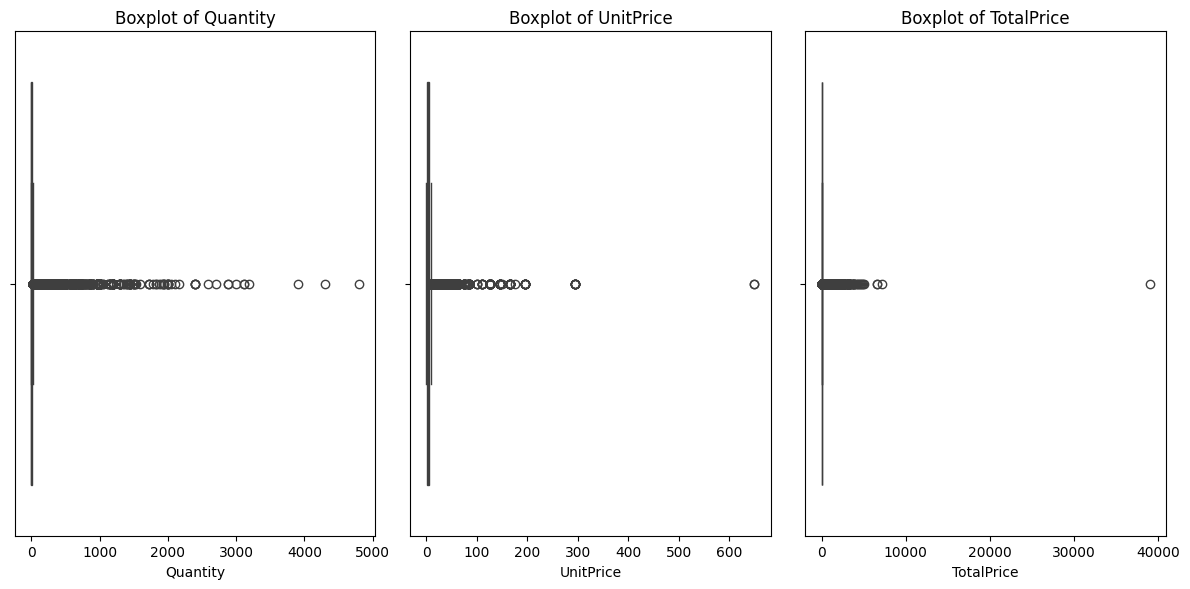

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns for analysis
columns = ['Quantity', 'UnitPrice', 'TotalPrice']

# Visualize the outliers using boxplots for the respective columns
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data_total_price[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [18]:
print(data_total_price.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


In [19]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Copy dataset
data_winsorized_1 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 1% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.01, 0.01))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_1[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 1% Successfully ===")
print(data_winsorized_1.describe())

# Copy dataset
data_winsorized_1_5 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 1.5% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.015, 0.015))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_1_5[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 1.5% Successfully ===")
print(data_winsorized_1_5.describe())

# Copy dataset
data_winsorized_1_75 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 1.75% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.0175, 0.0175))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_1_75[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 1.75% Successfully ===")
print(data_winsorized_1_75.describe())

# Copy dataset
data_winsorized_2 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 2% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.02, 0.02))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_2[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 2% Successfully ===")
print(data_winsorized_2.describe())

# Copy dataset
data_winsorized_2_5 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 2.5% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.025, 0.025))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_2_5[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 2.5% Successfully ===")
print(data_winsorized_2_5.describe())

# Copy dataset
data_winsorized_3 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 3% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.03, 0.03))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_3[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 3% Successfully ===")
print(data_winsorized_3.describe())

# Copy dataset
data_winsorized_5 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 5% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.05, 0.05))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_5[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 5% Successfully ===")
print(data_winsorized_5.describe())


=== Winsorization Applied for 1% Successfully ===
            Quantity      UnitPrice     CustomerID     TotalPrice
count  504019.000000  504019.000000  522698.000000  504019.000000
mean        8.871302       3.188169   15279.932982      16.647537
std        15.347357       3.118349    1651.394970      26.145279
min         1.000000       0.290000   12347.000000       0.550000
25%         1.000000       1.250000   13993.000000       3.900000
50%         4.000000       2.080000   15159.000000       9.920000
75%        12.000000       4.130000   16713.000000      17.700000
max       100.000000      16.630000   18287.000000     179.000000
=== Winsorization Applied for 1.5% Successfully ===
            Quantity      UnitPrice     CustomerID     TotalPrice
count  504019.000000  504019.000000  522698.000000  504019.000000
mean        8.820465       3.165206   15279.932982      16.209853
std        15.049143       3.024245    1651.394970      23.580439
min         1.000000       0.290000   12

In [79]:
import numpy as np
import pandas as pd

# Copy dataset
data_iqr_capped = data_total_price.copy()

# List of numerical columns for outlier handling
num_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

# Apply IQR capping for each numerical column
for col in num_cols:
    Q1 = data_total_price[col].quantile(0.25)
    Q3 = data_total_price[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 0.393* IQR
    upper_bound = Q3 + 8* IQR

    # Capping values outside the IQR range
    data_iqr_capped[col] = np.where(data_total_price[col] < lower_bound, lower_bound, data_total_price[col])
    data_iqr_capped[col] = np.where(data_total_price[col] > upper_bound, upper_bound, data_iqr_capped[col])

# Display summary statistics after IQR capping
print("=== IQR-Based Outlier lower_bound = Q1 - 0.393* IQR, upper_bound = Q3 + 8* IQR Capping Applied Successfully ===")
print(data_iqr_capped.describe())


=== IQR-Based Outlier lower_bound = Q1 - 0.393* IQR, upper_bound = Q3 + 8* IQR Capping Applied Successfully ===
            Quantity      UnitPrice     CustomerID     TotalPrice
count  522698.000000  522698.000000  522698.000000  522698.000000
mean        8.863809       3.234347   15279.932982      15.916170
std        15.339762       3.376093    1651.394970      22.107117
min         1.000000       0.118160   12347.000000       0.001000
25%         1.000000       1.250000   13993.000000       3.900000
50%         4.000000       2.080000   15159.000000       9.900000
75%        12.000000       4.130000   16713.000000      17.700000
max       100.000000      27.170000   18287.000000     128.100000


In [80]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Copy dataset
data_winsorized_1_15 = data_total_price.copy()

# Apply Winsorization with proper NumPy conversion
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    # Convert column to NumPy array before applying Winsorization
    array_col = data_total_price[col].astype(float).to_numpy()
    
    # Apply Winsorization (Example: 1% Winsorization)
    winsorized_col = winsorize(array_col, limits=(0.001, 0.01))

    # Convert back to Pandas Series & store it in the dataset
    data_winsorized_1_15[col] = pd.Series(winsorized_col)

# Display summary
print("=== Winsorization Applied for 0.001% & 0.01% Successfully ===")
print(data_winsorized_1_15.describe())


=== Winsorization Applied for 0.001% & 0.01% Successfully ===
            Quantity      UnitPrice     CustomerID     TotalPrice
count  504019.000000  504019.000000  522698.000000  504019.000000
mean        8.871302       3.187296   15279.932982      16.646423
std        15.347357       3.119177    1651.394970      26.145968
min         1.000000       0.120000   12347.000000       0.360000
25%         1.000000       1.250000   13993.000000       3.900000
50%         4.000000       2.080000   15159.000000       9.920000
75%        12.000000       4.130000   16713.000000      17.700000
max       100.000000      16.630000   18287.000000     179.000000


In [81]:
import numpy as np
import pandas as pd

# Copy dataset
data_capped_1_75_98_25 = data_total_price.copy()

# Define capping limits based on percentiles
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    lower_bound = np.percentile(data_total_price[col], 0.1)
    upper_bound = np.percentile(data_total_price[col], 99.00)
    
    # Apply capping
    data_capped_1_75_98_25[col] = np.clip(data_total_price[col], lower_bound, upper_bound)

# Display summary
print("=== Percentile-Based Capping (0.1% - 99%) Applied Successfully ===")
print(data_capped_1_75_98_25.describe())


=== Percentile-Based Capping (0.1% - 99%) Applied Successfully ===
            Quantity      UnitPrice     CustomerID     TotalPrice
count  522698.000000  522698.000000  522698.000000  522698.000000
mean        8.863809       3.186862   15279.932982      16.634413
std        15.339762       3.119251    1651.394970      26.133503
min         1.000000       0.120000   12347.000000       0.360000
25%         1.000000       1.250000   13993.000000       3.900000
50%         4.000000       2.080000   15159.000000       9.900000
75%        12.000000       4.130000   16713.000000      17.700000
max       100.000000      16.630000   18287.000000     179.000000


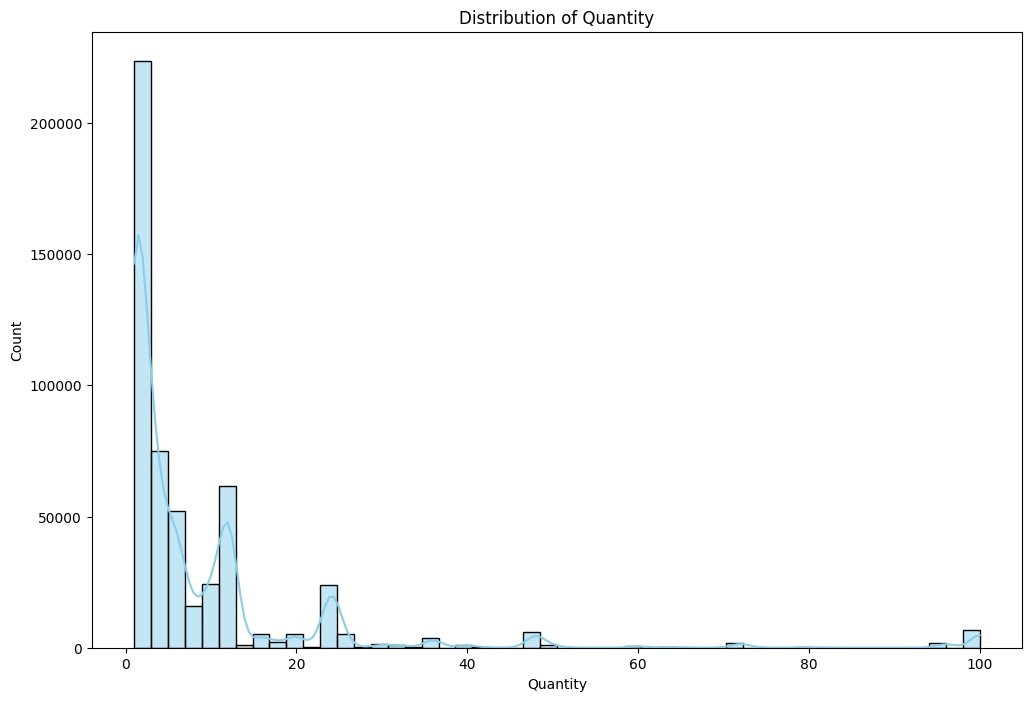

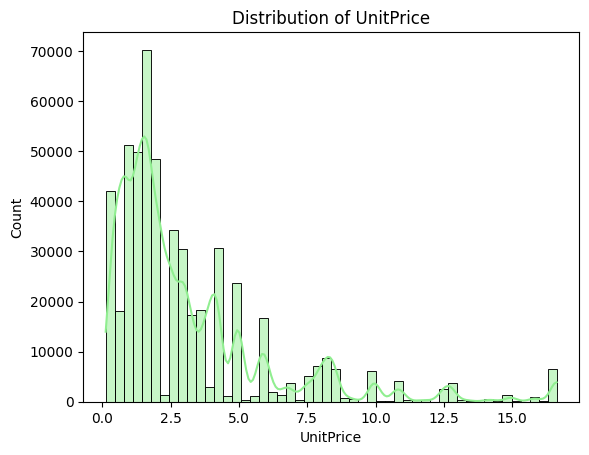

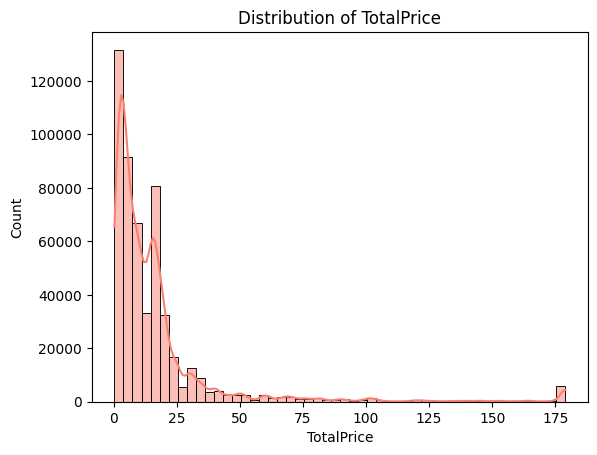

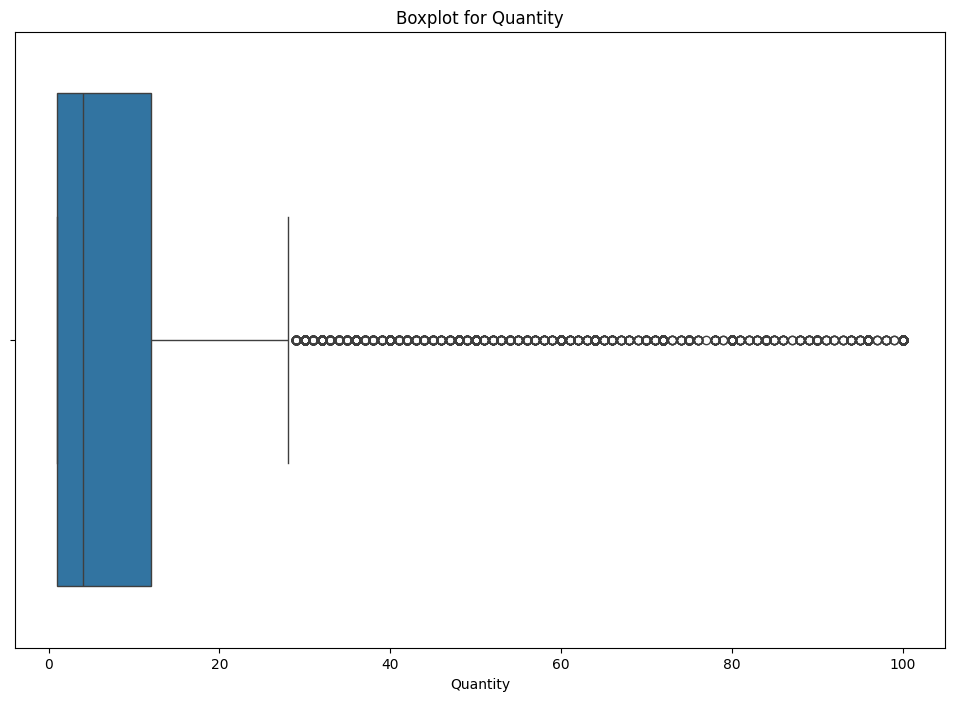

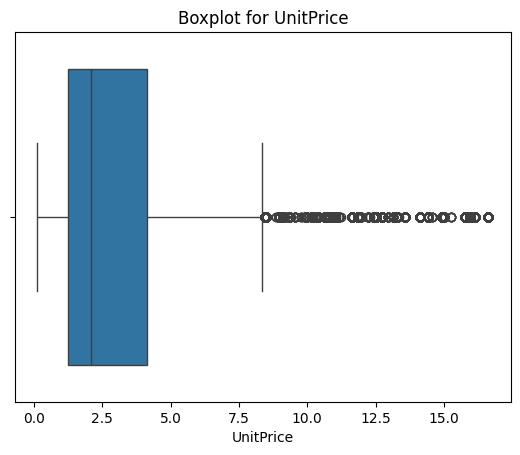

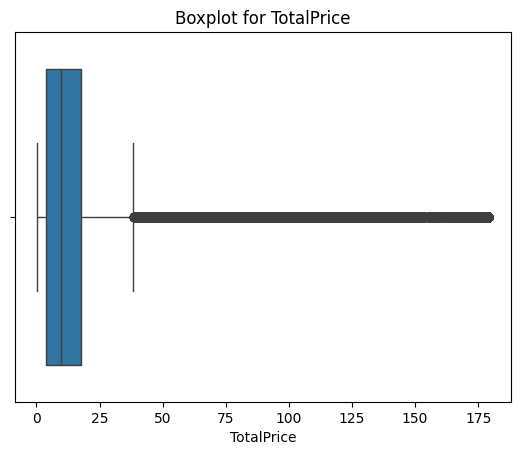

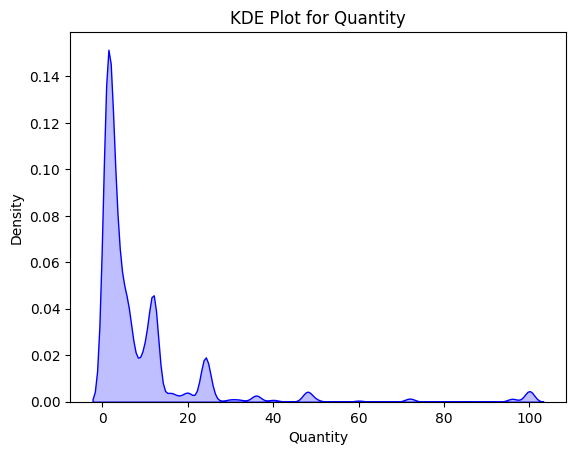

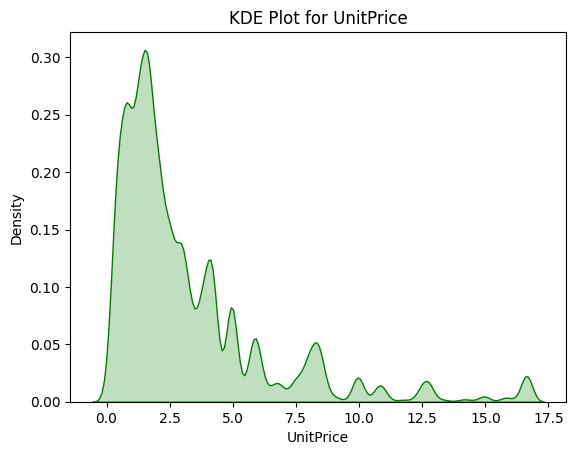

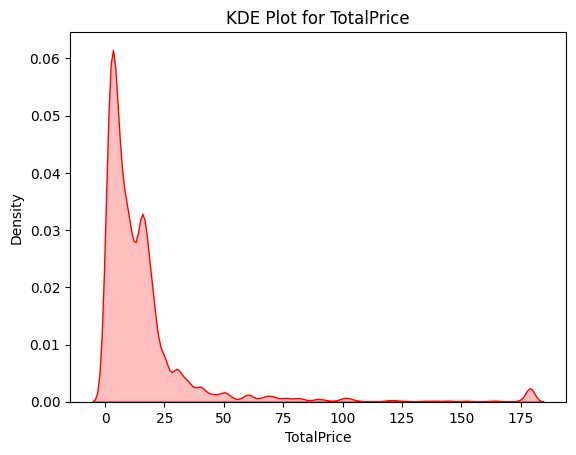

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_capped_1_75_98_25 is your outlier-handled data

# Plotting histograms
plt.figure(figsize=(12, 8))
sns.histplot(data_capped_1_75_98_25['Quantity'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Quantity')
plt.show()

sns.histplot(data_capped_1_75_98_25['UnitPrice'], kde=True, bins=50, color='lightgreen')
plt.title('Distribution of UnitPrice')
plt.show()

sns.histplot(data_capped_1_75_98_25['TotalPrice'], kde=True, bins=50, color='salmon')
plt.title('Distribution of TotalPrice')
plt.show()

# Boxplot to check for outliers visually
plt.figure(figsize=(12, 8))
sns.boxplot(x=data_capped_1_75_98_25['Quantity'])
plt.title('Boxplot for Quantity')
plt.show()

sns.boxplot(x=data_capped_1_75_98_25['UnitPrice'])
plt.title('Boxplot for UnitPrice')
plt.show()

sns.boxplot(x=data_capped_1_75_98_25['TotalPrice'])
plt.title('Boxplot for TotalPrice')
plt.show()

# KDE Plot with 'fill=True' instead of 'shade=True'
sns.kdeplot(data_capped_1_75_98_25['Quantity'], fill=True, color='blue')
plt.title('KDE Plot for Quantity')
plt.show()

sns.kdeplot(data_capped_1_75_98_25['UnitPrice'], fill=True, color='green')
plt.title('KDE Plot for UnitPrice')
plt.show()

sns.kdeplot(data_capped_1_75_98_25['TotalPrice'], fill=True, color='red')
plt.title('KDE Plot for TotalPrice')
plt.show()



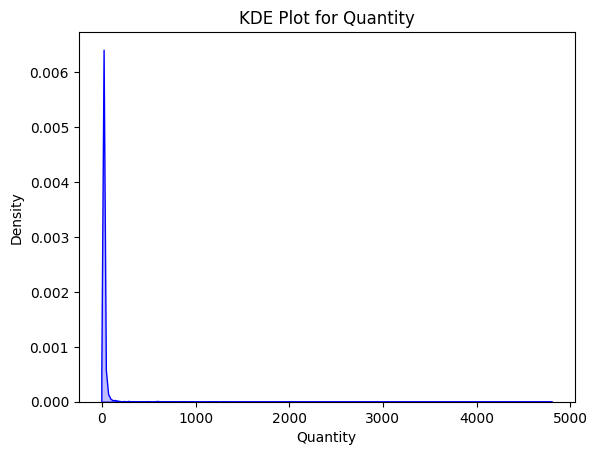

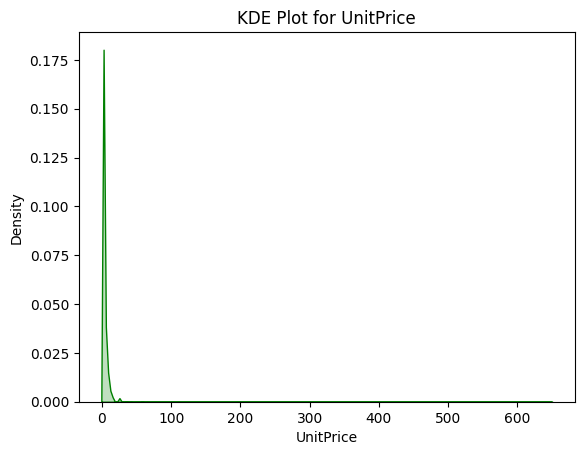

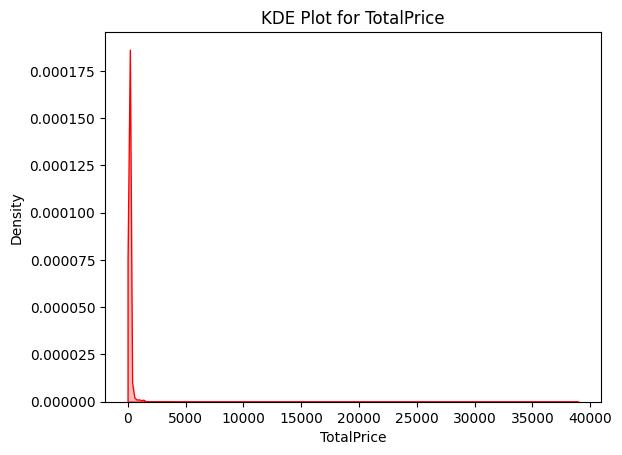

In [84]:
# KDE Plot with 'fill=True' instead of 'shade=True'
sns.kdeplot(data_total_price['Quantity'], fill=True, color='blue')
plt.title('KDE Plot for Quantity')
plt.show()

sns.kdeplot(data_total_price['UnitPrice'], fill=True, color='green')
plt.title('KDE Plot for UnitPrice')
plt.show()

sns.kdeplot(data_total_price['TotalPrice'], fill=True, color='red')
plt.title('KDE Plot for TotalPrice')
plt.show()


=== Log Transformation on Percentile-Based Capped data (0.1% - 99%) Applied Successfully ===
            Quantity      UnitPrice     CustomerID     TotalPrice  \
count  522698.000000  522698.000000  522698.000000  522698.000000   
mean        8.863809       3.186862   15279.932982      16.634413   
std        15.339762       3.119251    1651.394970      26.133503   
min         1.000000       0.120000   12347.000000       0.360000   
25%         1.000000       1.250000   13993.000000       3.900000   
50%         4.000000       2.080000   15159.000000       9.900000   
75%        12.000000       4.130000   16713.000000      17.700000   
max       100.000000      16.630000   18287.000000     179.000000   

        log_Quantity  log_UnitPrice  log_TotalPrice  
count  522698.000000  522698.000000   522698.000000  
mean        1.713315       1.228585        2.327104  
std         0.965880       0.607250        0.986549  
min         0.693147       0.113329        0.307485  
25%         0.6

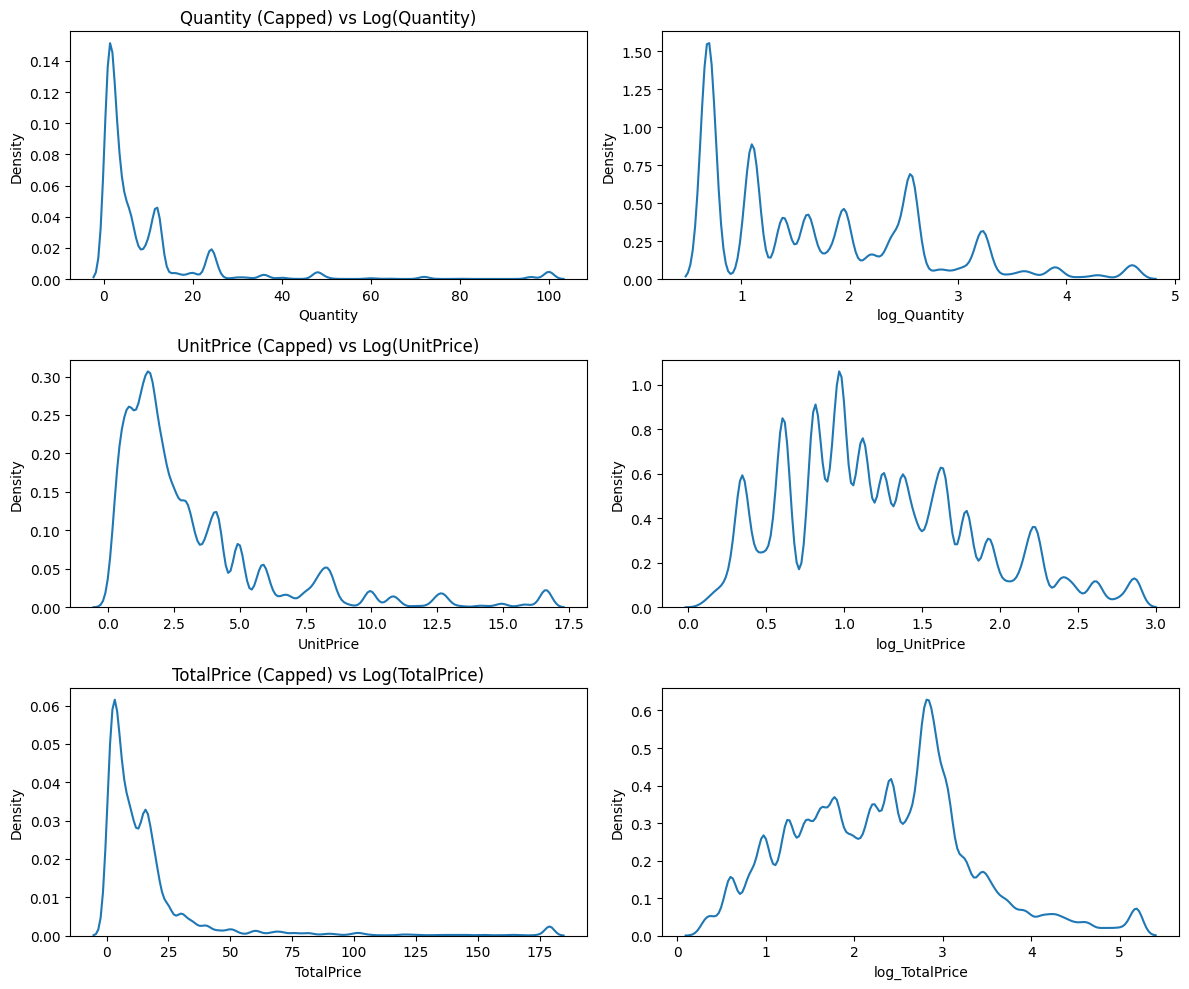

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the data
data_capped_transformed = data_capped_1_75_98_25.copy()

# Apply log transformation
data_capped_transformed['log_Quantity'] = np.log1p(data_capped_transformed['Quantity'])
data_capped_transformed['log_UnitPrice'] = np.log1p(data_capped_transformed['UnitPrice'])
data_capped_transformed['log_TotalPrice'] = np.log1p(data_capped_transformed['TotalPrice'])

print("=== Log Transformation on Percentile-Based Capped data (0.1% - 99%) Applied Successfully ===")
print(data_capped_transformed.describe())

# Plot KDE for comparison
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.kdeplot(data_capped_transformed['Quantity'], ax=axes[0, 0], label='Capped')
sns.kdeplot(data_capped_transformed['log_Quantity'], ax=axes[0, 1], label='Log-Transformed')

sns.kdeplot(data_capped_transformed['UnitPrice'], ax=axes[1, 0], label='Capped')
sns.kdeplot(data_capped_transformed['log_UnitPrice'], ax=axes[1, 1], label='Log-Transformed')

sns.kdeplot(data_capped_transformed['TotalPrice'], ax=axes[2, 0], label='Capped')
sns.kdeplot(data_capped_transformed['log_TotalPrice'], ax=axes[2, 1], label='Log-Transformed')

axes[0, 0].set_title("Quantity (Capped) vs Log(Quantity)")
axes[1, 0].set_title("UnitPrice (Capped) vs Log(UnitPrice)")
axes[2, 0].set_title("TotalPrice (Capped) vs Log(TotalPrice)")

plt.tight_layout()
plt.show()


In [88]:
# Drop the original columns to avoid confusion
data_capped_transformed_1 = data_capped_transformed.drop(['Quantity', 'UnitPrice', 'TotalPrice'], axis=1)

# Check the updated dataframe
data_capped_transformed_1.head()


,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,log_Quantity,log_UnitPrice,log_TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,17850,United Kingdom,1.945910,1.266948,2.791165
1,536365,71053,WHITE METAL LANTERN,12/1/2010 8:26,17850,United Kingdom,1.945910,1.479329,3.060583
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,17850,United Kingdom,2.197225,1.321756,3.135494
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,17850,United Kingdom,1.945910,1.479329,3.060583
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,17850,United Kingdom,1.945910,1.479329,3.060583


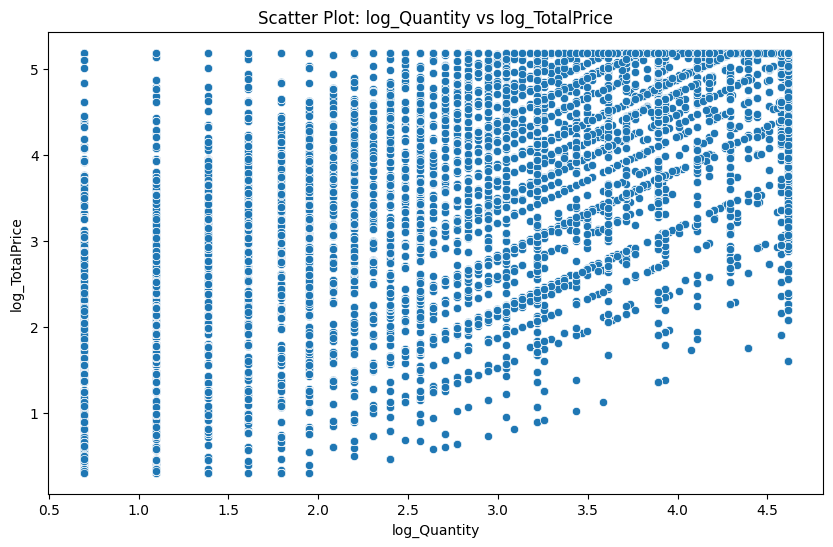

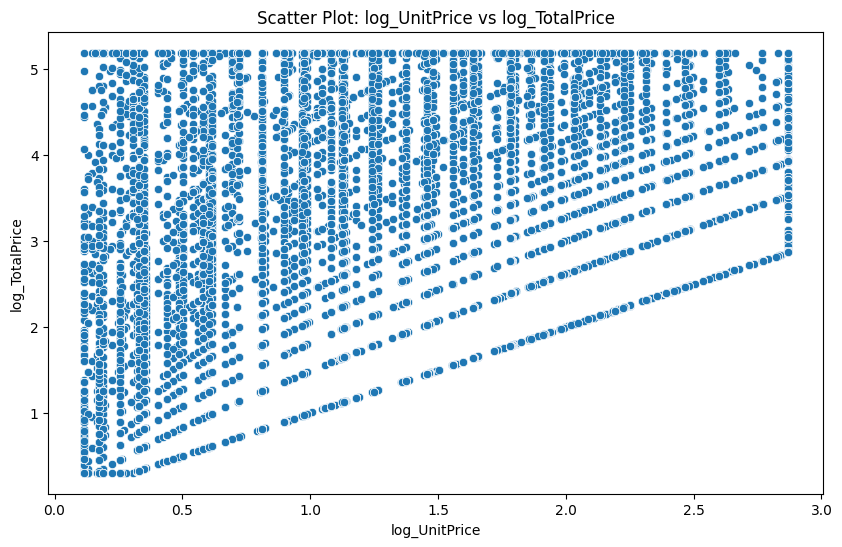

                log_Quantity  log_UnitPrice  log_TotalPrice
log_Quantity        1.000000      -0.417520        0.698155
log_UnitPrice      -0.417520       1.000000        0.334305
log_TotalPrice      0.698155       0.334305        1.000000


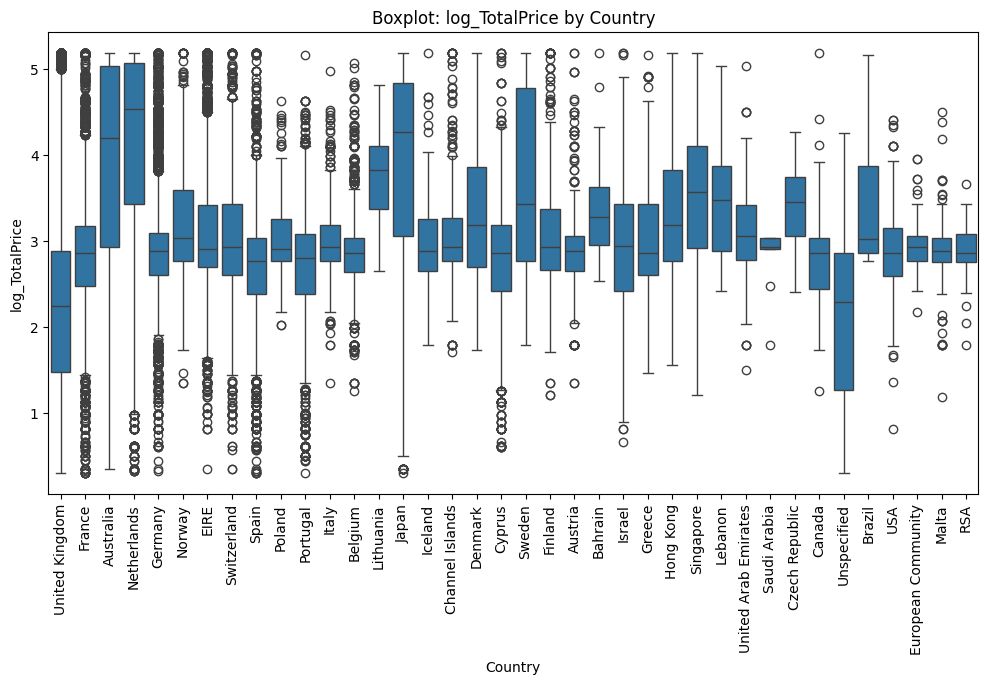

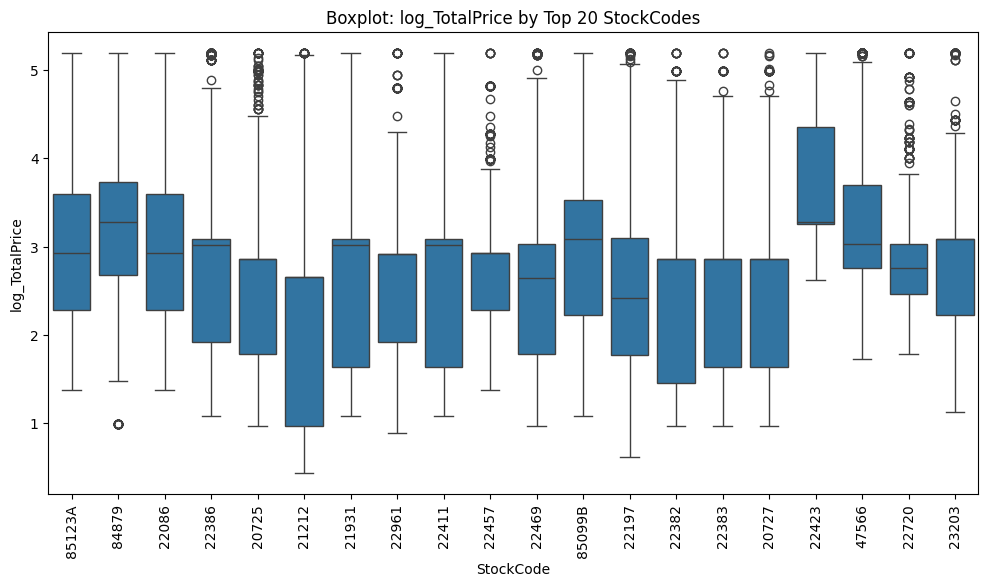

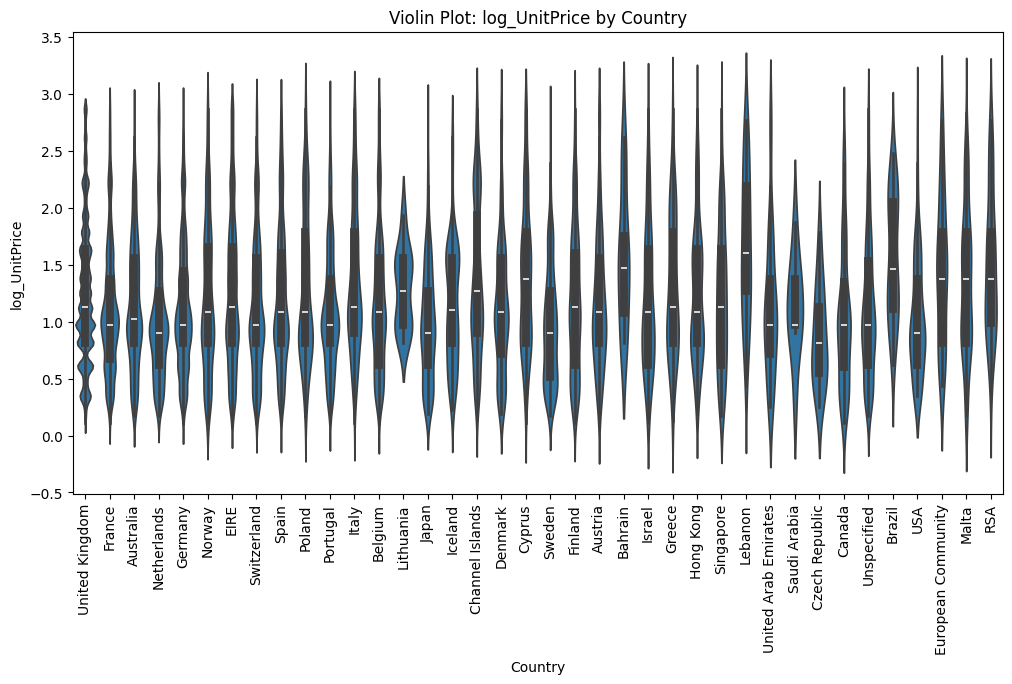

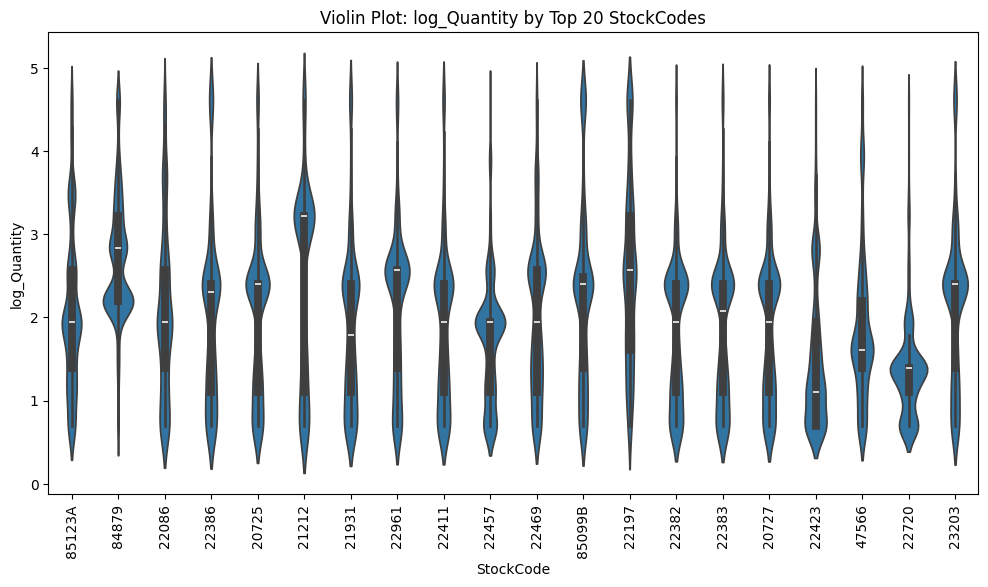

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Scatter Plot
# Scatter plot: log_Quantity vs log_TotalPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_Quantity', y='log_TotalPrice', data=data_capped_transformed_1)
plt.title('Scatter Plot: log_Quantity vs log_TotalPrice')
plt.xlabel('log_Quantity')
plt.ylabel('log_TotalPrice')
plt.show()

# Scatter plot: log_UnitPrice vs log_TotalPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_UnitPrice', y='log_TotalPrice', data=data_capped_transformed_1)
plt.title('Scatter Plot: log_UnitPrice vs log_TotalPrice')
plt.xlabel('log_UnitPrice')
plt.ylabel('log_TotalPrice')
plt.show()

# 2. Correlation Coefficients
correlations = data_capped_transformed_1[['log_Quantity', 'log_UnitPrice', 'log_TotalPrice']].corr()
print(correlations)

# 3. Boxplots
# Boxplot for TotalPrice by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='log_TotalPrice', data=data_capped_transformed_1)
plt.title('Boxplot: log_TotalPrice by Country')
plt.xlabel('Country')
plt.ylabel('log_TotalPrice')
plt.xticks(rotation=90)
plt.show()

# Boxplot for TotalPrice by StockCode
# Top 20 most frequent StockCodes by frequency
top_stockcodes = data_capped_transformed_1['StockCode'].value_counts().head(20).index

# Filter data to include only the top 20 StockCodes
filtered_data = data_capped_transformed_1[data_capped_transformed_1['StockCode'].isin(top_stockcodes)]

# Boxplot for TotalPrice by the top 20 StockCodes
plt.figure(figsize=(12, 6))
sns.boxplot(x='StockCode', y='log_TotalPrice', data=filtered_data)
plt.title('Boxplot: log_TotalPrice by Top 20 StockCodes')
plt.xlabel('StockCode')
plt.ylabel('log_TotalPrice')
plt.xticks(rotation=90)
plt.show()


# 4. Violin Plots
# Violin plot for UnitPrice by Country
plt.figure(figsize=(12, 6))
sns.violinplot(x='Country', y='log_UnitPrice', data=data_capped_transformed_1)
plt.title('Violin Plot: log_UnitPrice by Country')
plt.xlabel('Country')
plt.ylabel('log_UnitPrice')
plt.xticks(rotation=90)
plt.show()

# Violin plot for Quantity by StockCode
# Filter data to include only the top 20 most frequent StockCodes
top_stockcodes = data_capped_transformed_1['StockCode'].value_counts().head(20).index
filtered_data = data_capped_transformed_1[data_capped_transformed_1['StockCode'].isin(top_stockcodes)]

# Violin plot for Quantity by the top 20 StockCodes
plt.figure(figsize=(12, 6))
sns.violinplot(x='StockCode', y='log_Quantity', data=filtered_data)
plt.title('Violin Plot: log_Quantity by Top 20 StockCodes')
plt.xlabel('StockCode')
plt.ylabel('log_Quantity')
plt.xticks(rotation=90)
plt.show()


Correlation Matrix:
                 log_Quantity  log_UnitPrice  log_TotalPrice
log_Quantity        1.000000      -0.417520        0.698155
log_UnitPrice      -0.417520       1.000000        0.334305
log_TotalPrice      0.698155       0.334305        1.000000


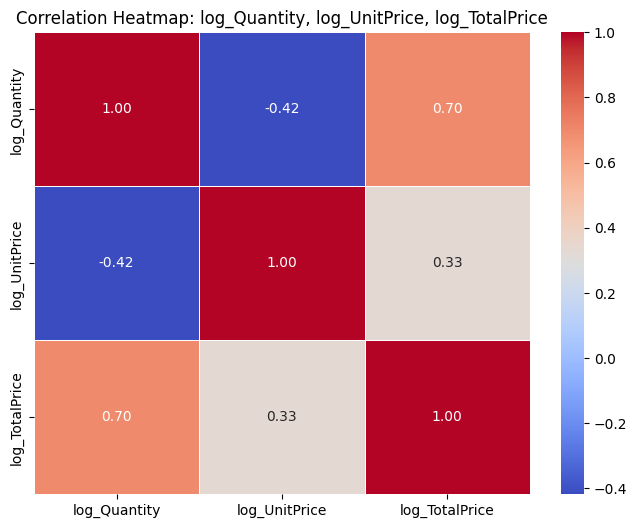

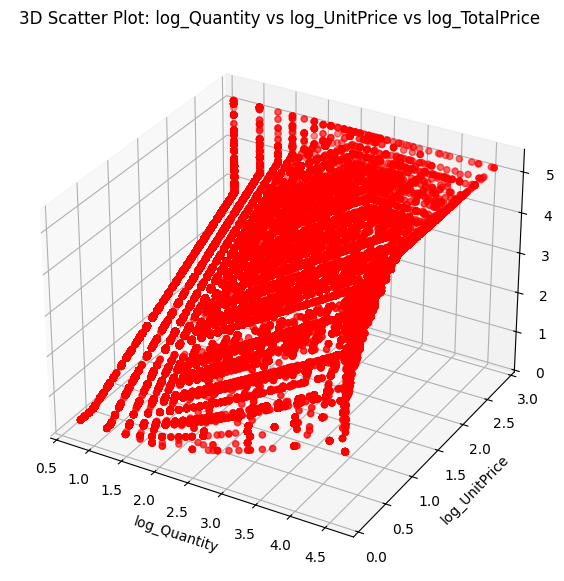

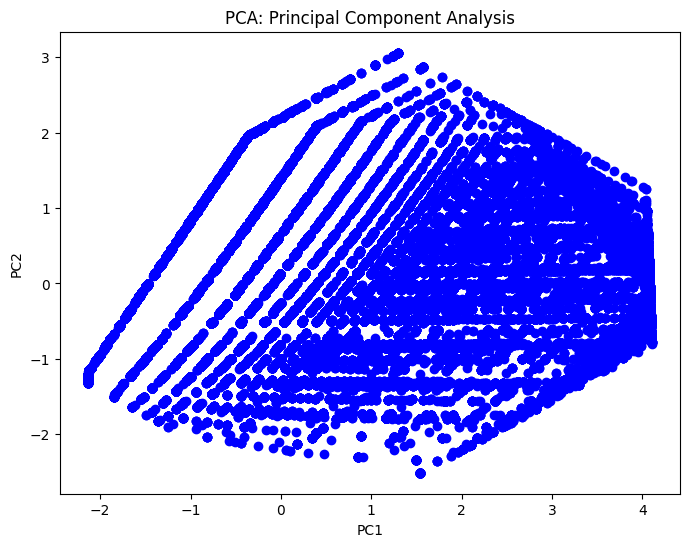

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd

# Select relevant columns
data_multivariate = data_capped_transformed_1[['log_Quantity', 'log_UnitPrice', 'log_TotalPrice']]

# 1. Correlation Heatmap
print("Correlation Matrix:\n", data_multivariate.corr())  # Printing the correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = data_multivariate.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: log_Quantity, log_UnitPrice, log_TotalPrice")
plt.show()

# 2. 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points
ax.scatter(data_capped_transformed_1['log_Quantity'], 
           data_capped_transformed_1['log_UnitPrice'], 
           data_capped_transformed_1['log_TotalPrice'], c='r', marker='o')

# Labels and title
ax.set_xlabel('log_Quantity')
ax.set_ylabel('log_UnitPrice')
ax.set_zlabel('log_TotalPrice')
ax.set_title('3D Scatter Plot: log_Quantity vs log_UnitPrice vs log_TotalPrice')
plt.show()

# 3. Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
pca_result = pca.fit_transform(data_multivariate)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='b', marker='o')
plt.title('PCA: Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [92]:
print(data_capped_transformed_1.head())
print(data_capped_transformed_1.info())
print(data_capped_transformed_1.nunique())

  InvoiceNo StockCode                          Description     InvoiceDate  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  12/1/2010 8:26   
1    536365     71053                  WHITE METAL LANTERN  12/1/2010 8:26   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  12/1/2010 8:26   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  12/1/2010 8:26   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  12/1/2010 8:26   

   CustomerID         Country  log_Quantity  log_UnitPrice  log_TotalPrice  
0       17850  United Kingdom      1.945910       1.266948        2.791165  
1       17850  United Kingdom      1.945910       1.479329        3.060583  
2       17850  United Kingdom      2.197225       1.321756        3.135494  
3       17850  United Kingdom      1.945910       1.479329        3.060583  
4       17850  United Kingdom      1.945910       1.479329        3.060583  
<class 'pandas.core.frame.DataFrame'>
Index: 522698 entries, 0 to 541

In [93]:
# Get the unique count of countries
unique_countries = data_capped_transformed_1['Country'].nunique()

# List of unique countries
country_list = data_capped_transformed_1['Country'].unique()

print(f"Number of unique countries: {unique_countries}")
print(f"List of unique countries: {country_list}")


Number of unique countries: 38
List of unique countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [94]:
# Get the count of records for each country
country_count = data_capped_transformed_1['Country'].value_counts()

# Display the result
print(country_count)


Country
United Kingdom          478923
Germany                   8643
France                    8086
EIRE                      7873
Spain                     2417
Netherlands               2322
Belgium                   1935
Switzerland               1927
Portugal                  1455
Australia                 1180
Norway                    1048
Channel Islands            746
Italy                      741
Finland                    647
Cyprus                     601
Unspecified                442
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     292
Hong Kong                  275
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57


In [96]:
import pandas as pd
import scipy.stats as stats

# Group countries into 'UK' and 'Other'
data_capped_transformed_1['Country_Group'] = data_capped_transformed_1['Country'].apply(
    lambda x: 'UK' if x == 'United Kingdom' else 'Other'
)

# 1. T-test (Independent Samples) - TotalPrice by Country
uk_data = data_capped_transformed_1[data_capped_transformed_1['Country_Group'] == 'UK']['log_TotalPrice']
other_data = data_capped_transformed_1[data_capped_transformed_1['Country_Group'] == 'Other']['log_TotalPrice']

t_stat, p_value = stats.ttest_ind(uk_data, other_data)

print("T-test (UK vs Other countries):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("The difference between the United Kingdom and other countries is statistically significant.")
else:
    print("The difference between the United Kingdom and other countries is not statistically significant.")
print("-" * 50)

# 2. ANOVA (Analysis of Variance) - TotalPrice across different StockCodes
# We will perform ANOVA on the log_TotalPrice by StockCode
stockcode_groups = [group['log_TotalPrice'] for name, group in data_capped_transformed_1.groupby('StockCode')]
f_stat, p_value_anova = stats.f_oneway(*stockcode_groups)

print("ANOVA (TotalPrice across different StockCodes):")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value_anova}")
if p_value_anova < 0.05:
    print("There is a statistically significant difference in TotalPrice across different StockCodes.")
else:
    print("There is no statistically significant difference in TotalPrice across different StockCodes.")
print("-" * 50)

# 3. Chi-Square Test - StockCode vs. Country
# Creating a contingency table for StockCode vs. Country
contingency_table = pd.crosstab(data_capped_transformed_1['StockCode'], data_capped_transformed_1['Country'])

chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test (StockCode vs. Country):")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value_chi2}")
if p_value_chi2 < 0.05:
    print("There is a statistically significant relationship between StockCode and Country.")
else:
    print("There is no statistically significant relationship between StockCode and Country.")
print("-" * 50)

# 4. Mann-Whitney U Test - TotalPrice between two customer segments (e.g., high vs low spenders)
# Let's assume 'high spenders' are those with TotalPrice > median, and 'low spenders' are those with TotalPrice <= median
median_total_price = data_capped_transformed_1['log_TotalPrice'].median()
high_spenders = data_capped_transformed_1[data_capped_transformed_1['log_TotalPrice'] > median_total_price]['log_TotalPrice']
low_spenders = data_capped_transformed_1[data_capped_transformed_1['log_TotalPrice'] <= median_total_price]['log_TotalPrice']

u_stat, p_value_mannwhitney = stats.mannwhitneyu(high_spenders, low_spenders)

print("Mann-Whitney U Test (TotalPrice between high and low spenders):")
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value_mannwhitney}")
if p_value_mannwhitney < 0.05:
    print("The difference between high and low spenders is statistically significant.")
else:
    print("The difference between high and low spenders is not statistically significant.")
print("-" * 50)


T-test (UK vs Other countries):
T-statistic: -161.9446755781259
P-value: 0.0
The difference between the United Kingdom and other countries is statistically significant.
--------------------------------------------------
ANOVA (TotalPrice across different StockCodes):
F-statistic: 55.45910314447395
P-value: 0.0
There is a statistically significant difference in TotalPrice across different StockCodes.
--------------------------------------------------
Chi-Square Test (StockCode vs. Country):
Chi2 Statistic: 215377.53688886596
P-value: 0.0
There is a statistically significant relationship between StockCode and Country.
--------------------------------------------------
Mann-Whitney U Test (TotalPrice between high and low spenders):
U-statistic: 68303262165.0
P-value: 0.0
The difference between high and low spenders is statistically significant.
--------------------------------------------------


In [102]:
print(data_capped_transformed_1.head())
print(data_capped_transformed_1.info())
print(data_capped_transformed_1.isnull().sum())
print(data_capped_transformed_1.nunique())

  InvoiceNo StockCode                          Description     InvoiceDate  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  12/1/2010 8:26   
1    536365     71053                  WHITE METAL LANTERN  12/1/2010 8:26   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  12/1/2010 8:26   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  12/1/2010 8:26   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  12/1/2010 8:26   

   CustomerID         Country  log_Quantity  log_UnitPrice  log_TotalPrice  \
0       17850  United Kingdom      1.945910       1.266948        2.791165   
1       17850  United Kingdom      1.945910       1.479329        3.060583   
2       17850  United Kingdom      2.197225       1.321756        3.135494   
3       17850  United Kingdom      1.945910       1.479329        3.060583   
4       17850  United Kingdom      1.945910       1.479329        3.060583   

  Country_Group  
0            UK  
1            UK  
2       

In [103]:
# Copy the data for invoice date feature extraction
data_capped_transformed_1dt = data_capped_transformed_1.copy()

# Convert InvoiceDate to datetime (format: %m/%d/%Y %H:%M)
data_capped_transformed_1dt['InvoiceDate'] = pd.to_datetime(data_capped_transformed_1dt['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Extract additional features from InvoiceDate
data_capped_transformed_1dt['DayOfWeek'] = data_capped_transformed_1dt['InvoiceDate'].dt.dayofweek  # 0=Monday, 6=Sunday
data_capped_transformed_1dt['HourOfDay'] = data_capped_transformed_1dt['InvoiceDate'].dt.hour        # Hour in 24-hour format
data_capped_transformed_1dt['Month'] = data_capped_transformed_1dt['InvoiceDate'].dt.month           # Month (1-12)
data_capped_transformed_1dt['Year'] = data_capped_transformed_1dt['InvoiceDate'].dt.year             # Year

# Check the newly extracted features
print(data_capped_transformed_1dt[['InvoiceDate', 'DayOfWeek', 'HourOfDay', 'Month', 'Year']].head())


          InvoiceDate  DayOfWeek  HourOfDay  Month  Year
0 2010-12-01 08:26:00          2          8     12  2010
1 2010-12-01 08:26:00          2          8     12  2010
2 2010-12-01 08:26:00          2          8     12  2010
3 2010-12-01 08:26:00          2          8     12  2010
4 2010-12-01 08:26:00          2          8     12  2010


In [104]:
print(data_capped_transformed_1dt.head())
print(data_capped_transformed_1dt.info())
print(data_capped_transformed_1dt.isnull().sum())
print(data_capped_transformed_1dt.nunique())

  InvoiceNo StockCode                          Description  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1    536365     71053                  WHITE METAL LANTERN   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

          InvoiceDate  CustomerID         Country  log_Quantity  \
0 2010-12-01 08:26:00       17850  United Kingdom      1.945910   
1 2010-12-01 08:26:00       17850  United Kingdom      1.945910   
2 2010-12-01 08:26:00       17850  United Kingdom      2.197225   
3 2010-12-01 08:26:00       17850  United Kingdom      1.945910   
4 2010-12-01 08:26:00       17850  United Kingdom      1.945910   

   log_UnitPrice  log_TotalPrice Country_Group  DayOfWeek  HourOfDay  Month  \
0       1.266948        2.791165            UK          2          8     12   
1       1.479329        3.060583            UK          2         

In [105]:
# 1. Top Customers Identification
top_customers = data_capped_transformed_1dt.groupby('CustomerID')['log_TotalPrice'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers based on total spending:")
print(top_customers)

# 2. Purchase Frequency
purchase_frequency = data_capped_transformed_1dt.groupby('CustomerID')['InvoiceNo'].nunique()
purchase_frequency = purchase_frequency.sort_values(ascending=False).head(10)
print("\nTop 10 Customers based on number of purchases:")
print(purchase_frequency)

# 3. Average Order Value (AOV)
aov = data_capped_transformed_1dt.groupby('InvoiceNo')['log_TotalPrice'].sum().mean()
print(f"\nAverage Order Value (AOV): {aov}")

# 4. Customer Lifetime Value (CLV) Prediction (Total Spending for each customer)
clv = data_capped_transformed_1dt.groupby('CustomerID')['log_TotalPrice'].sum()
clv = clv.sort_values(ascending=False).head(10)
print("\nTop 10 Customers based on predicted Lifetime Value (Total Spending):")
print(clv)


Top 10 Customers based on total spending:
CustomerID
14911    16983.229835
17841    11435.865961
14096    10395.547224
14646     8924.045280
12748     7123.097483
13089     5804.262367
15311     5423.717625
14298     5345.053956
14156     5169.554651
14606     4250.387700
Name: log_TotalPrice, dtype: float64

Top 10 Customers based on number of purchases:
CustomerID
14911    225
12748    215
17841    137
14606    119
13089    118
15311    111
12971    102
14646     99
13408     91
14527     89
Name: InvoiceNo, dtype: int64

Average Order Value (AOV): 61.50750702305556

Top 10 Customers based on predicted Lifetime Value (Total Spending):
CustomerID
14911    16983.229835
17841    11435.865961
14096    10395.547224
14646     8924.045280
12748     7123.097483
13089     5804.262367
15311     5423.717625
14298     5345.053956
14156     5169.554651
14606     4250.387700
Name: log_TotalPrice, dtype: float64


In [106]:
# Make a copy of the data to preserve the original data
data_rfm_captransformed_dt = data_capped_transformed_1dt.copy()

# Calculate Recency: Days since last purchase
# Most recent date in the dataset
max_date = data_rfm_captransformed_dt['InvoiceDate'].max()

# Recency calculation (days since last purchase)
data_rfm = data_rfm_captransformed_dt.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (max_date - x.max()).days),
    frequency=('InvoiceNo', 'nunique'),
    monetary=('log_TotalPrice', 'sum')
).reset_index()

# Show the first few rows
print(data_rfm.head())


   CustomerID  recency  frequency    monetary
0       12347        1          7  549.293523
1       12348       74          4  101.734541
2       12349       18          1  212.358379
3       12350      309          1   46.829722
4       12352       35          7  224.592798


In [107]:
print(data_rfm.head())
print(data_rfm.info())
print(data_rfm.isnull().sum())
print(data_rfm.nunique())

   CustomerID  recency  frequency    monetary
0       12347        1          7  549.293523
1       12348       74          4  101.734541
2       12349       18          1  212.358379
3       12350      309          1   46.829722
4       12352       35          7  224.592798
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5921 non-null   int32  
 1   recency     5921 non-null   int64  
 2   frequency   5921 non-null   int64  
 3   monetary    5921 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 162.0 KB
None
CustomerID    0
recency       0
frequency     0
monetary      0
dtype: int64
CustomerID    5921
recency        140
frequency       81
monetary      5919
dtype: int64


In [108]:
# Function to assign RFM score based on percentile ranges
def rfm_score(data, column, ascending=False):
    """
    Assign scores for Recency, Frequency, and Monetary values based on percentiles.
    Higher scores are assigned for better customer behavior (e.g., more frequent, recent).
    """
    if ascending:
        return pd.qcut(data[column], 5, labels=[5, 4, 3, 2, 1])
    else:
        return pd.qcut(data[column], 5, labels=[1, 2, 3, 4, 5])

# Assigning RFM scores
data_rfm['recency_score'] = rfm_score(data_rfm, 'recency', ascending=True)  # lower recency is better
data_rfm['frequency_score'] = rfm_score(data_rfm, 'frequency', ascending=False)  # higher frequency is better
data_rfm['monetary_score'] = rfm_score(data_rfm, 'monetary', ascending=False)  # higher monetary is better

# Combine the scores into a single 'RFM_Score' column
data_rfm['RFM_Score'] = data_rfm['recency_score'].astype(str) + data_rfm['frequency_score'].astype(str) + data_rfm['monetary_score'].astype(str)

# Display the top 10 rows of the resulting RFM DataFrame
print(data_rfm[['CustomerID', 'recency', 'frequency', 'monetary', 'recency_score', 'frequency_score', 'monetary_score', 'RFM_Score']].head())


   CustomerID  recency  frequency    monetary recency_score frequency_score  \
0       12347        1          7  549.293523             5               1   
1       12348       74          4  101.734541             1               1   
2       12349       18          1  212.358379             1               1   
3       12350      309          1   46.829722             1               1   
4       12352       35          7  224.592798             1               1   

  monetary_score RFM_Score  
0              5       515  
1              3       113  
2              4       114  
3              1       111  
4              4       114  


In [109]:
# Segmenting the customers into groups based on their RFM score
def segment_customers(rfm_score):
    if rfm_score == '555':
        return 'Best Customers'
    elif rfm_score in ['554', '545', '544']:
        return 'Loyal Customers'
    elif rfm_score in ['553', '443', '444']:
        return 'Potential Loyalist'
    elif rfm_score in ['123', '124']:
        return 'New Customers'
    else:
        return 'Other'

data_rfm['Segment'] = data_rfm['RFM_Score'].apply(segment_customers)

# Display the segmented customers
print(data_rfm[['CustomerID', 'RFM_Score', 'Segment']].head())


   CustomerID RFM_Score Segment
0       12347       515   Other
1       12348       113   Other
2       12349       114   Other
3       12350       111   Other
4       12352       114   Other


In [110]:
# Grouping by customer segment
segment_summary = data_rfm.groupby('Segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()

# Displaying the summary
print(segment_summary)


              Segment    recency  frequency    monetary  CustomerID
0      Best Customers   0.571429  42.207143  961.428799         280
1     Loyal Customers   0.574176  30.434066  273.452933         364
2       New Customers  20.845238  19.607143  137.902268          84
3               Other  13.570810  21.731117  161.804270        5084
4  Potential Loyalist   1.201835  31.944954  123.292006         109


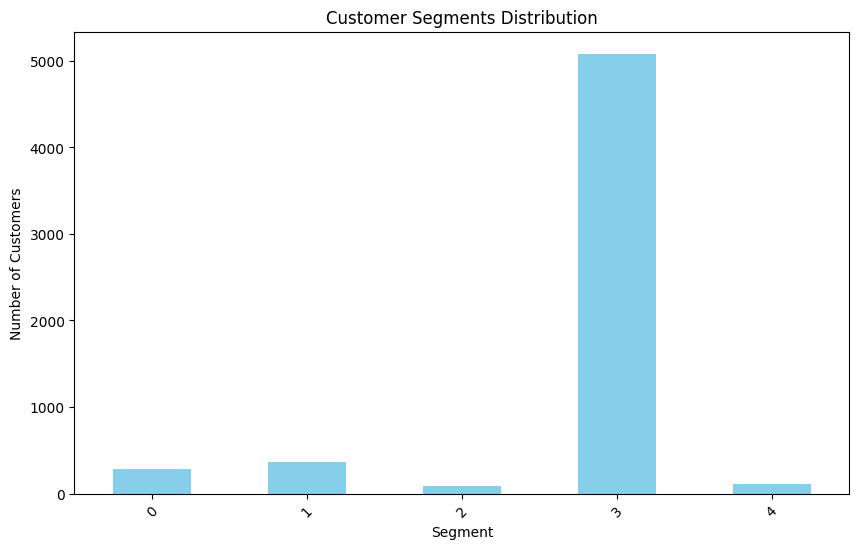

In [111]:
import matplotlib.pyplot as plt

# Plotting the distribution of customers by segment
plt.figure(figsize=(10, 6))
segment_summary['CustomerID'].plot(kind='bar', x=segment_summary['Segment'], y='CustomerID', color='skyblue')
plt.title('Customer Segments Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.show()


In [112]:
print(data_rfm.info())
print(data_rfm.isnull().sum())
print(data_rfm.nunique())
print(data_rfm.duplicated().sum())
print(segment_summary.info())
print(segment_summary.isnull().sum())
print(segment_summary.nunique())
print(segment_summary.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5921 entries, 0 to 5920
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerID       5921 non-null   int32   
 1   recency          5921 non-null   int64   
 2   frequency        5921 non-null   int64   
 3   monetary         5921 non-null   float64 
 4   recency_score    5921 non-null   category
 5   frequency_score  5921 non-null   category
 6   monetary_score   5921 non-null   category
 7   RFM_Score        5921 non-null   object  
 8   Segment          5921 non-null   object  
dtypes: category(3), float64(1), int32(1), int64(2), object(2)
memory usage: 272.5+ KB
None
CustomerID         0
recency            0
frequency          0
monetary           0
recency_score      0
frequency_score    0
monetary_score     0
RFM_Score          0
Segment            0
dtype: int64
CustomerID         5921
recency             140
frequency            81
monetary   

Correlation Matrix - Recency, Frequency, Monetary:
            recency  frequency  monetary
recency    1.000000  -0.411742 -0.071699
frequency -0.411742   1.000000  0.540074
monetary  -0.071699   0.540074  1.000000


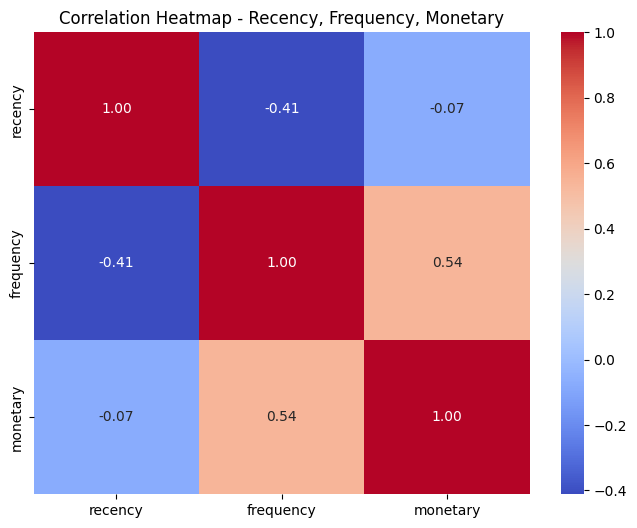

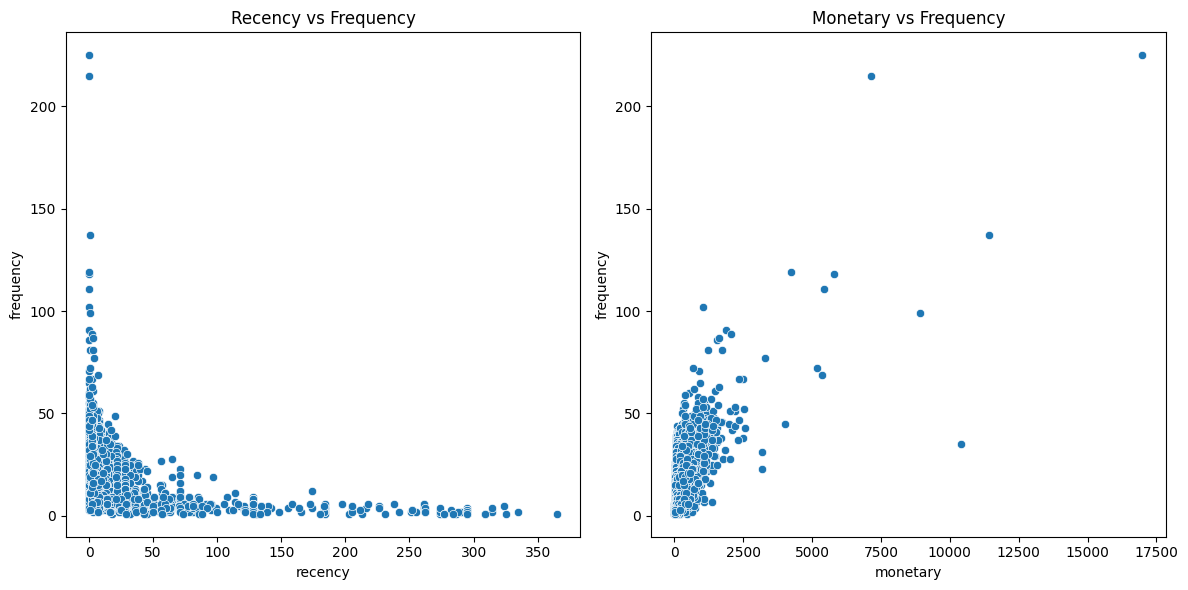

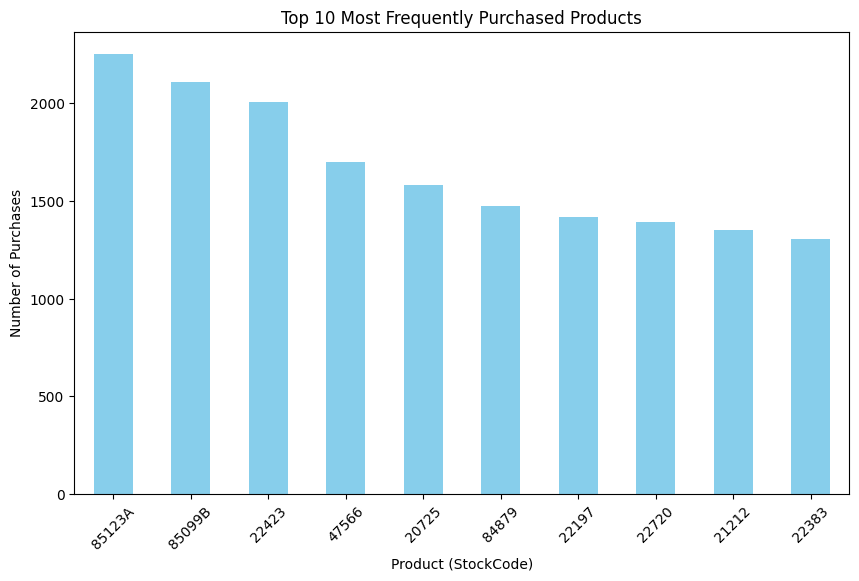

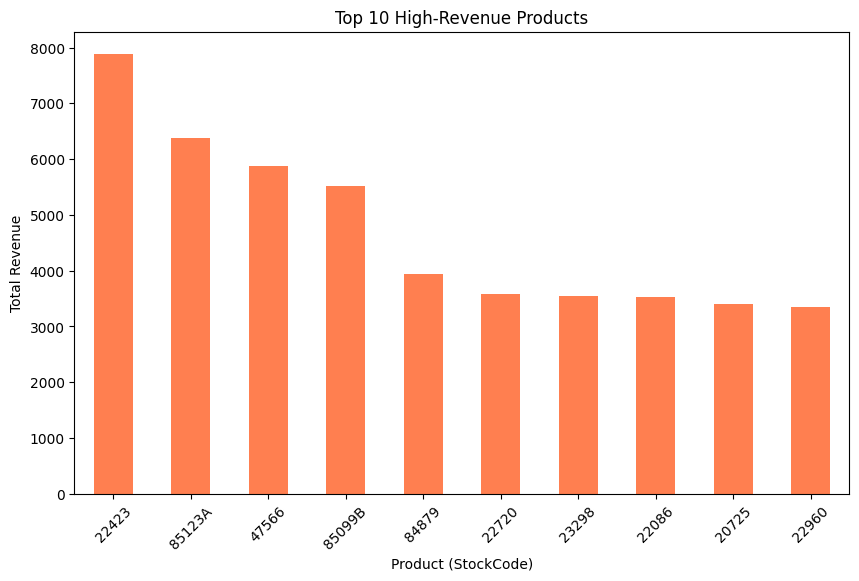

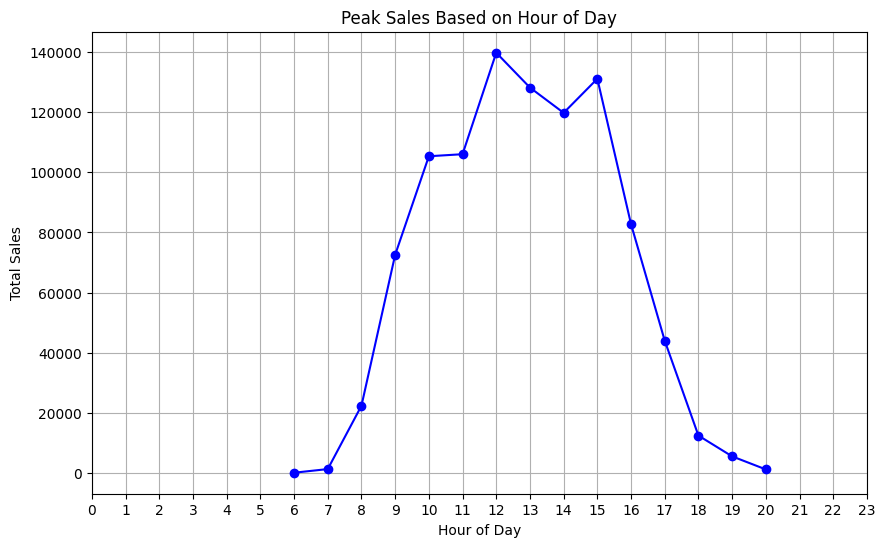

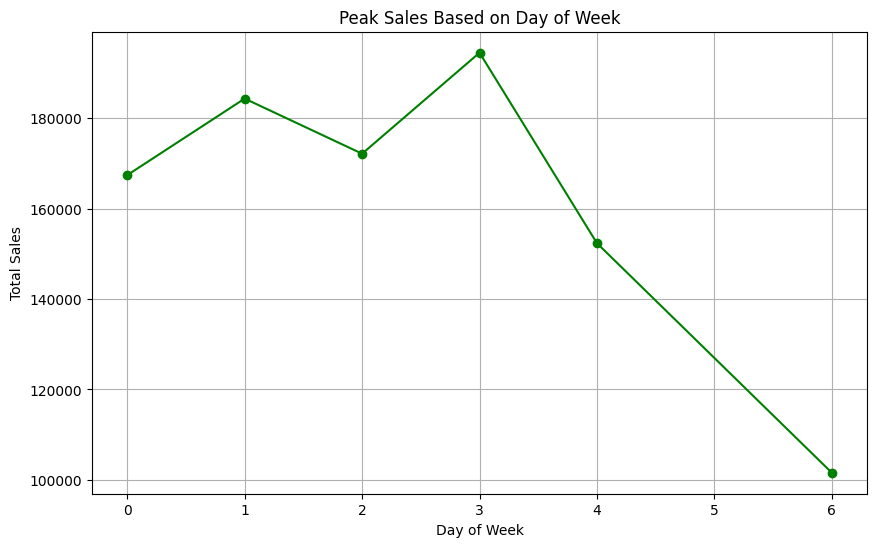

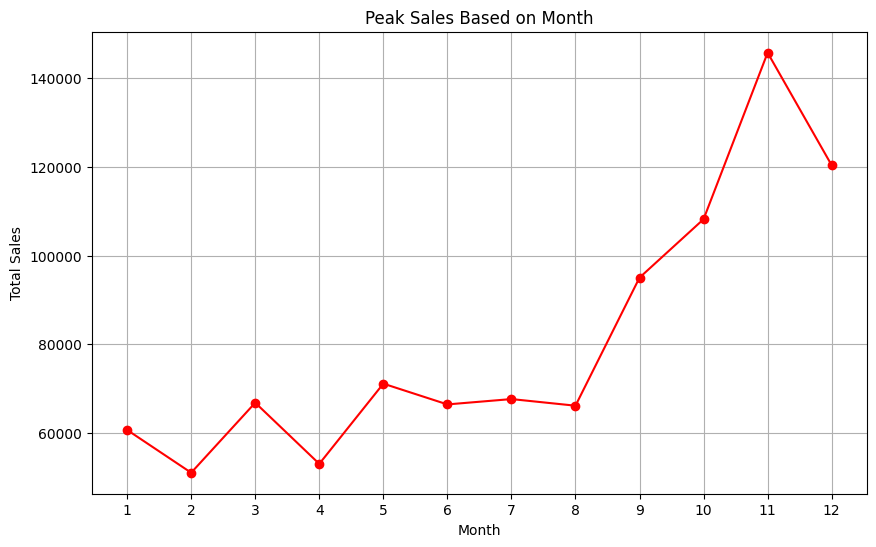


Correlation Matrix - Quantity, UnitPrice, TotalPrice:
                log_Quantity  log_UnitPrice  log_TotalPrice
log_Quantity        1.000000      -0.417520        0.698155
log_UnitPrice      -0.417520       1.000000        0.334305
log_TotalPrice      0.698155       0.334305        1.000000


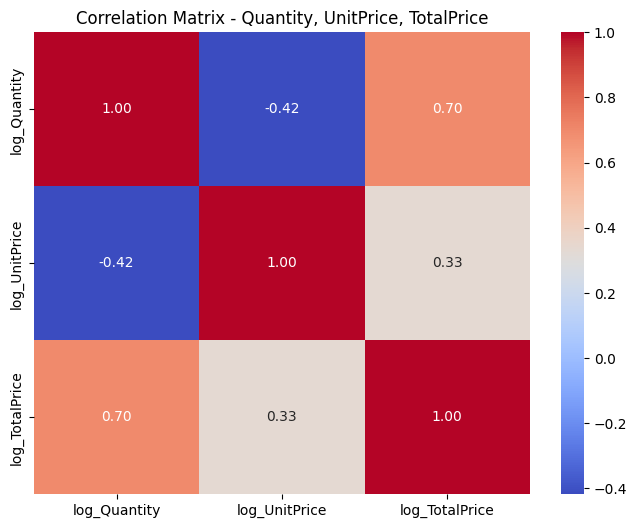


Pearson Correlation Matrix:
                log_Quantity  log_UnitPrice  log_TotalPrice
log_Quantity        1.000000      -0.417520        0.698155
log_UnitPrice      -0.417520       1.000000        0.334305
log_TotalPrice      0.698155       0.334305        1.000000


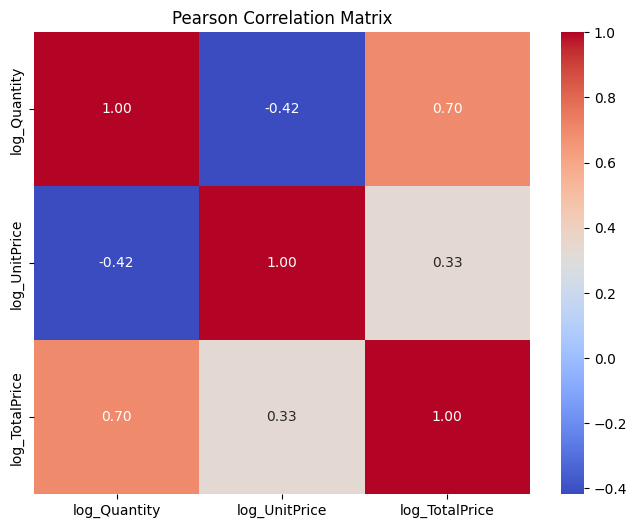


Spearman Correlation Matrix:
                log_Quantity  log_UnitPrice  log_TotalPrice
log_Quantity        1.000000      -0.406878        0.682027
log_UnitPrice      -0.406878       1.000000        0.329336
log_TotalPrice      0.682027       0.329336        1.000000


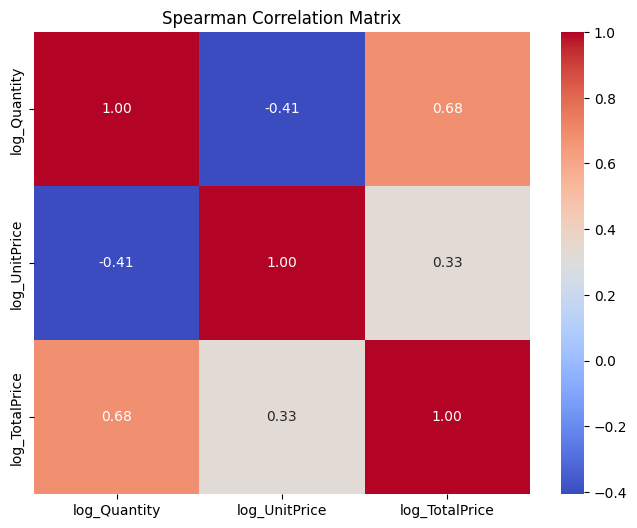

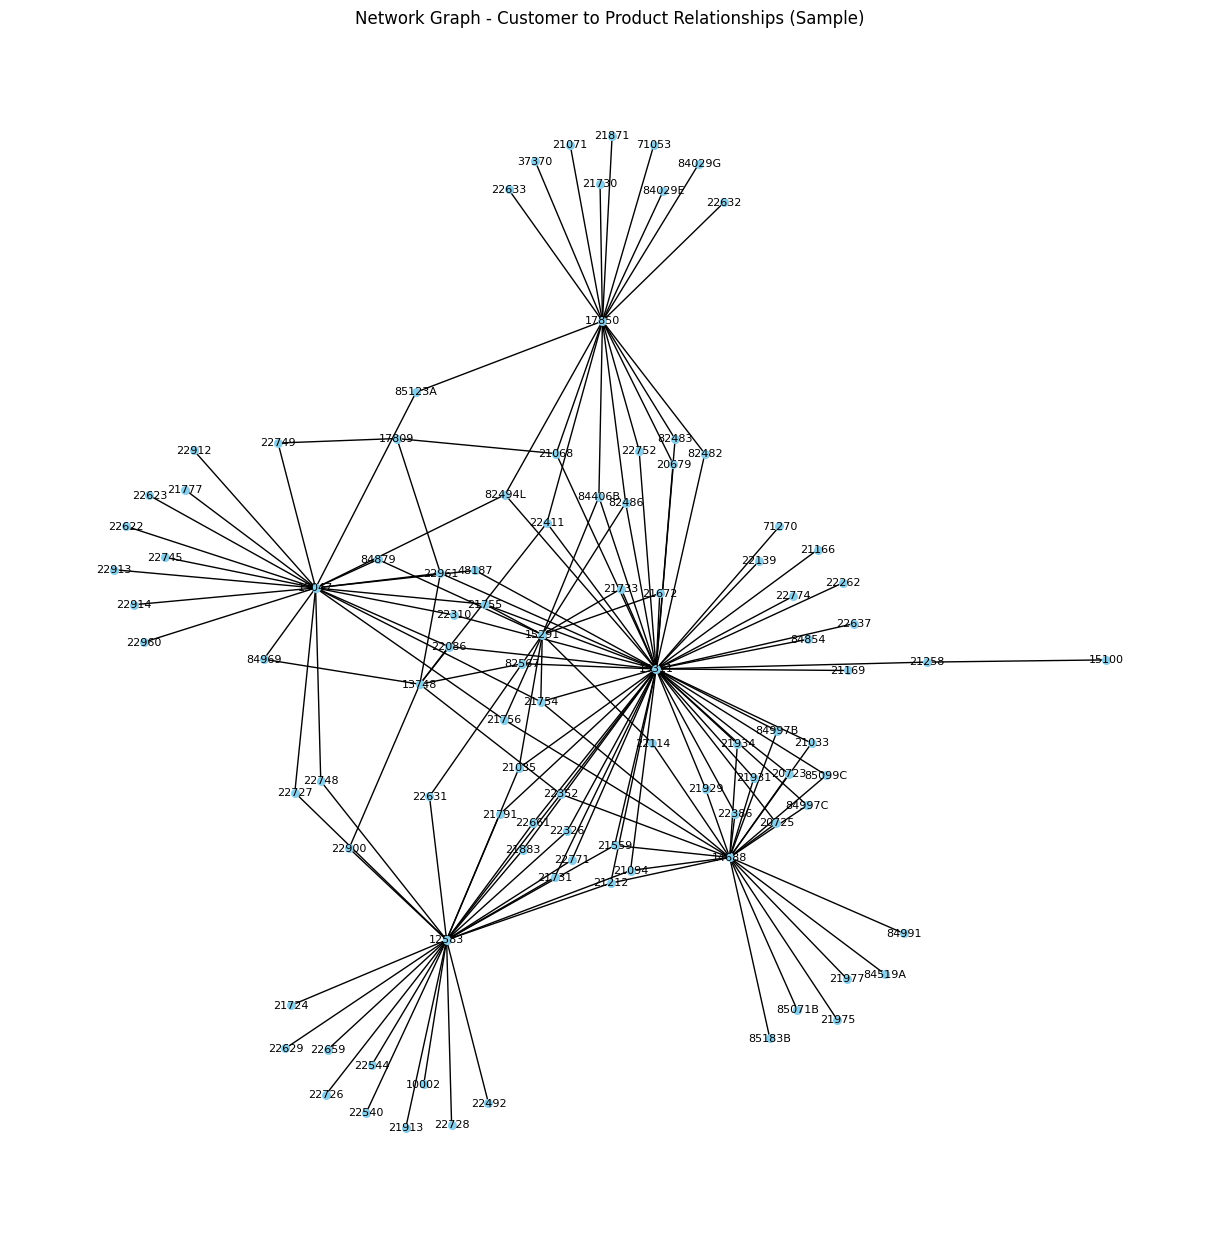

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx

# Assuming data_rfm and data_capped_transformed_1dt are already loaded

# --- 1. Heatmap of correlations ---
correlation_matrix = data_rfm[['recency', 'frequency', 'monetary']].corr()
print("Correlation Matrix - Recency, Frequency, Monetary:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap - Recency, Frequency, Monetary')
plt.show()

# --- 2. Scatter Plot (Recency vs Frequency, Monetary vs Frequency) ---
plt.figure(figsize=(12, 6))

# Recency vs Frequency
plt.subplot(1, 2, 1)
sns.scatterplot(x='recency', y='frequency', data=data_rfm)
plt.title('Recency vs Frequency')

# Monetary vs Frequency
plt.subplot(1, 2, 2)
sns.scatterplot(x='monetary', y='frequency', data=data_rfm)
plt.title('Monetary vs Frequency')

plt.tight_layout()
plt.show()

# --- 3. Top-Selling Products (Bar Plot) ---
top_selling_products = data_capped_transformed_1dt.groupby('StockCode')['InvoiceNo'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Product (StockCode)')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# --- 4. High Revenue Products (Bar Plot) ---
data_capped_transformed_1dt['TotalPrice'] = data_capped_transformed_1dt['log_UnitPrice'] * data_capped_transformed_1dt['log_Quantity']  # Adjust as necessary
high_revenue_products = data_capped_transformed_1dt.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
high_revenue_products.plot(kind='bar', color='coral')
plt.title('Top 10 High-Revenue Products')
plt.xlabel('Product (StockCode)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# --- 5. Time-Based Analysis ---
# Peak Sales based on Hour of Day
hourly_sales = data_capped_transformed_1dt.groupby('HourOfDay')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='b')
plt.title('Peak Sales Based on Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Peak Sales based on Day of Week
daily_sales = data_capped_transformed_1dt.groupby('DayOfWeek')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', marker='o', color='g')
plt.title('Peak Sales Based on Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(range(7))
plt.grid(True)
plt.show()

# Peak Sales based on Month
monthly_sales = data_capped_transformed_1dt.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='r')
plt.title('Peak Sales Based on Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# --- 6. Correlation Matrix of Numerical Variables ---
numerical_columns = ['log_Quantity', 'log_UnitPrice', 'log_TotalPrice']
correlation_matrix_numerical = data_capped_transformed_1dt[numerical_columns].corr()

print("\nCorrelation Matrix - Quantity, UnitPrice, TotalPrice:")
print(correlation_matrix_numerical)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_numerical, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix - Quantity, UnitPrice, TotalPrice')
plt.show()

# --- 7. Pairwise Correlation (Pearson and Spearman) ---
pearson_corr = data_capped_transformed_1dt[numerical_columns].corr(method='pearson')
spearman_corr = data_capped_transformed_1dt[numerical_columns].corr(method='spearman')

# Pearson
print("\nPearson Correlation Matrix:")
print(pearson_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Pearson Correlation Matrix')
plt.show()

# Spearman
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()

# --- 8. Network Graph Analysis ---
# Let's create a simple network of customer-product relationships using `networkx`.

# Create graph based on customer and product relationship
G = nx.Graph()
for idx, row in data_capped_transformed_1dt.iterrows():
    G.add_edge(row['CustomerID'], row['StockCode'])

# Plot Network Graph (limited to a sample of 100 customers for visibility)
plt.figure(figsize=(12, 12))
subgraph = G.subgraph(list(G.nodes)[:100])  # Limit to first 100 customers for better visualization
nx.draw(subgraph, with_labels=True, node_size=30, node_color='skyblue', font_size=8)
plt.title('Network Graph - Customer to Product Relationships (Sample)')
plt.show()
